In [56]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [57]:
# Load dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\n" + "="*50)
print("First few rows:")
print(df.head())
print("\n" + "="*50)
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("Column Names:")
print(df.columns.tolist())

Dataset Shape: (374, 13)

First few rows:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200          

In [58]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Summary statistics for numerical columns
print("\n" + "="*50)
print("Numerical Features Summary:")
print(df.describe())

# Summary statistics for categorical columns
print("\n" + "="*50)
print("Categorical Features Summary:")
print(df.describe(include=['object']))

Number of duplicate rows: 0

Numerical Features Summary:
        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   

In [59]:
# Check missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("Missing Values Analysis:")
print(missing_df)

# Check unique values in Sleep Disorder column
print("\n" + "="*50)
print("Sleep Disorder Value Counts:")
print(df['Sleep Disorder'].value_counts(dropna=False))

Missing Values Analysis:
            Column  Missing_Count  Missing_Percentage
12  Sleep Disorder            219            58.55615

Sleep Disorder Value Counts:
Sleep Disorder
NaN            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [60]:
# Sleep Disorder NaN values represent "None" (no disorder)
# This is not missing data but a meaningful category
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

print("Sleep Disorder after handling NaN:")
print(df['Sleep Disorder'].value_counts())
print(f"\nTotal records: {len(df)}")

Sleep Disorder after handling NaN:
Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

Total records: 374


In [61]:
# Split Blood Pressure into systolic and diastolic
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

print("Blood Pressure split into components:")
print(df[['Blood Pressure', 'Systolic_BP', 'Diastolic_BP']].head())

# Check all data types after transformation
print("\n" + "="*50)
print("Data types after transformation:")
print(df.dtypes)

Blood Pressure split into components:
  Blood Pressure  Systolic_BP  Diastolic_BP
0         126/83          126            83
1         125/80          125            80
2         125/80          125            80
3         140/90          140            90
4         140/90          140            90

Data types after transformation:
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
Systolic_BP                  int64
Diastolic_BP                 int64
dtype: object


Exploratory Data Analysis - Univariate Analysis

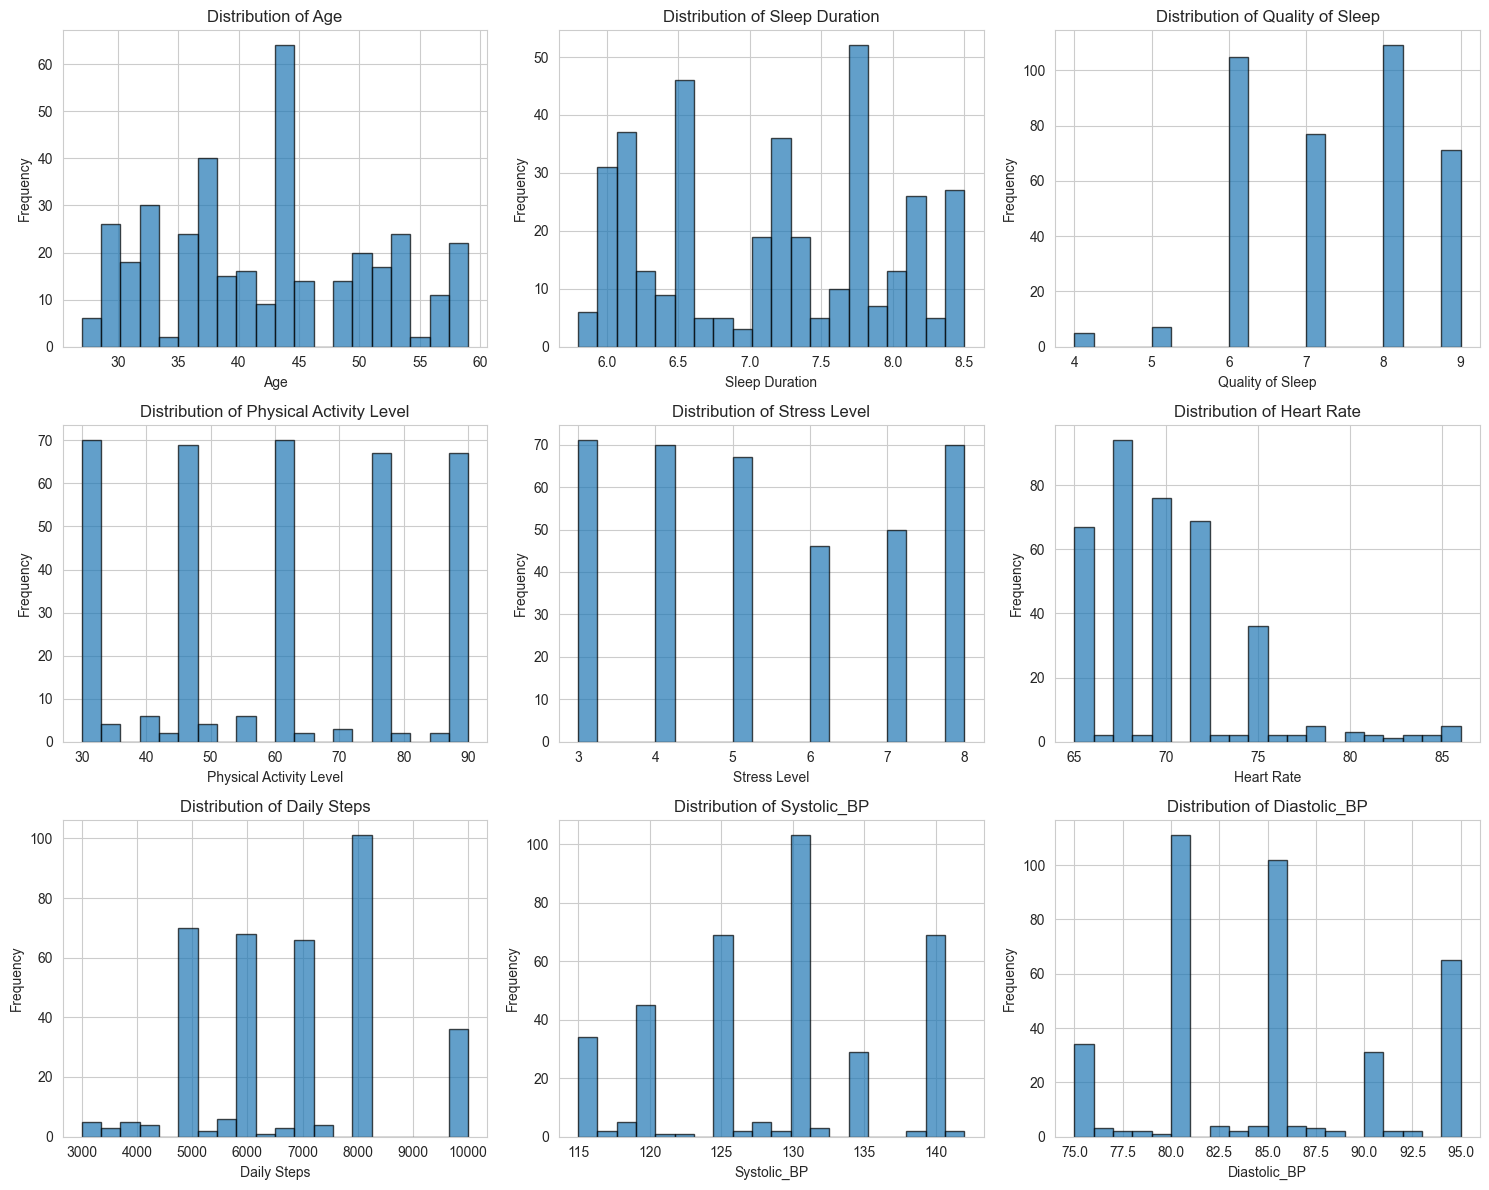

In [ ]:
# Analyze distribution of numerical features
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                  'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show() 

Categorical Features Distribution

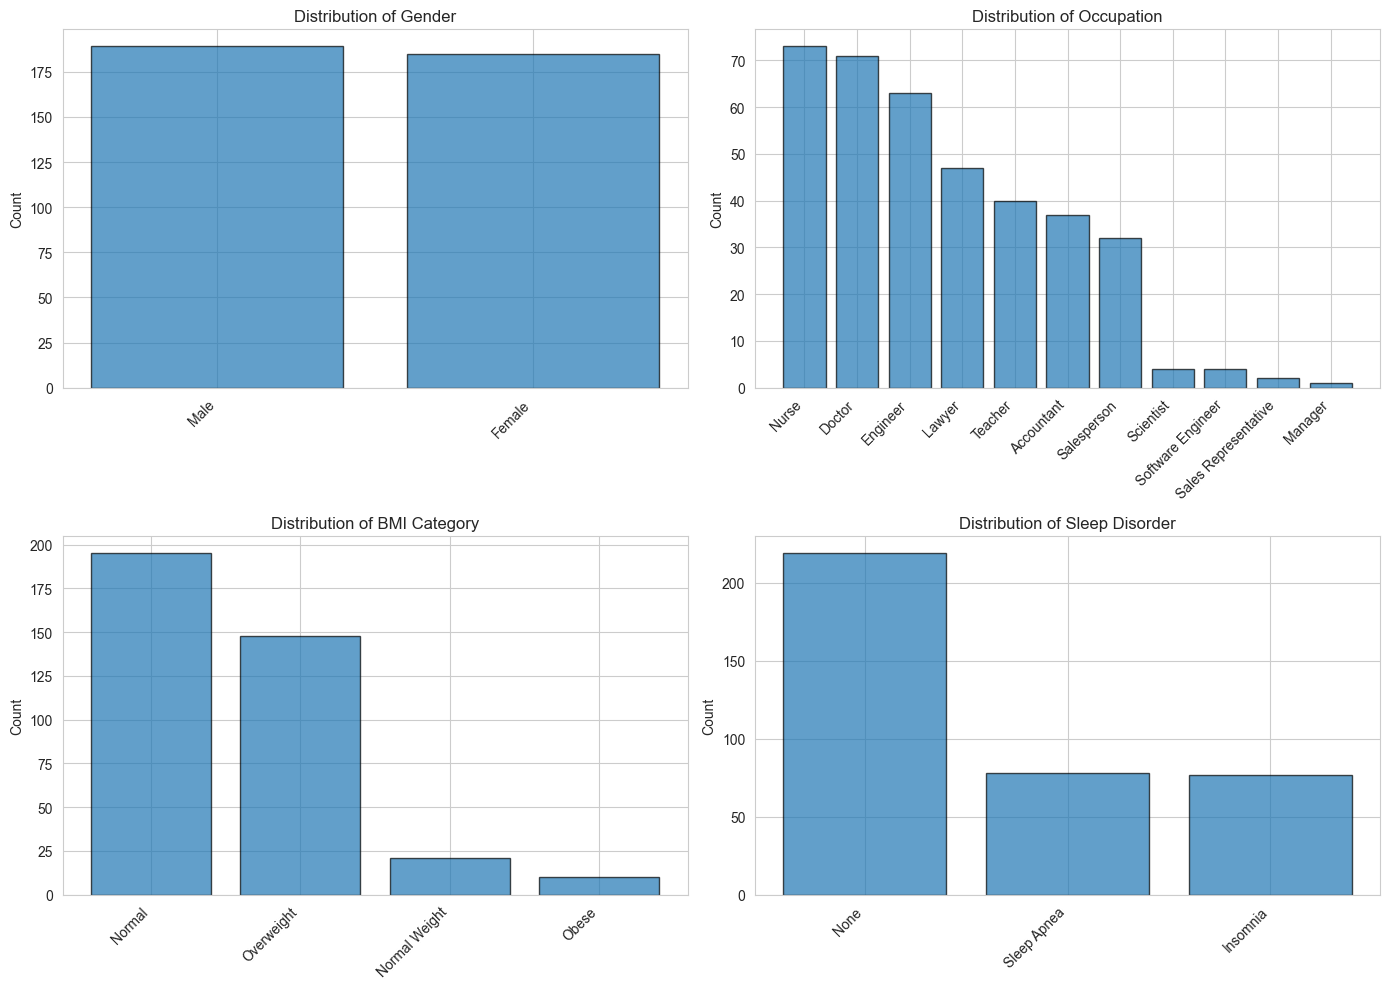


Gender Distribution:
Gender
Male      189
Female    185
Name: count, dtype: int64
----------------------------------------

Occupation Distribution:
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
----------------------------------------

BMI Category Distribution:
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64
----------------------------------------

Sleep Disorder Distribution:
Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64
----------------------------------------


In [63]:
# Analyze categorical features
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values, edgecolor='black', alpha=0.7)
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Print value counts
for col in categorical_cols:
    print(f"\n{col} Distribution:")
    print(df[col].value_counts())
    print("-" * 40)

Fairness Analysis - Demographic Representation

In [64]:
# Analyze fairness across demographic groups
print("FAIRNESS ANALYSIS")
print("="*50)

# Gender distribution
gender_dist = df['Gender'].value_counts(normalize=True) * 100
print("\nGender Distribution (%):")
print(gender_dist)

# Age distribution by gender
print("\nAge Statistics by Gender:")
print(df.groupby('Gender')['Age'].describe())

# Sleep quality by gender
print("\nSleep Quality by Gender:")
print(df.groupby('Gender')['Quality of Sleep'].describe())

# Occupation diversity
print("\nOccupation Count:")
print(df['Occupation'].value_counts())

# Sleep disorder prevalence by gender
print("\nSleep Disorder Distribution by Gender:")
print(pd.crosstab(df['Gender'], df['Sleep Disorder'], normalize='index') * 100)

FAIRNESS ANALYSIS

Gender Distribution (%):
Gender
Male      50.534759
Female    49.465241
Name: proportion, dtype: float64

Age Statistics by Gender:
        count       mean       std   min   25%   50%   75%   max
Gender                                                          
Female  185.0  47.405405  8.093407  29.0  39.0  50.0  53.0  59.0
Male    189.0  37.074074  5.662006  27.0  32.0  38.0  43.0  49.0

Sleep Quality by Gender:
        count      mean       std  min  25%  50%  75%  max
Gender                                                    
Female  185.0  7.664865  1.279482  4.0  7.0  8.0  9.0  9.0
Male    189.0  6.968254  0.999493  4.0  6.0  7.0  8.0  9.0

Occupation Count:
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1


Statistical Tests for Fairness

In [65]:
# Test for significant differences between groups
from scipy.stats import chi2_contingency, ttest_ind

# Chi-square test for sleep disorder and gender
contingency_table = pd.crosstab(df['Gender'], df['Sleep Disorder'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test: Sleep Disorder vs Gender")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Association is {'significant' if p_value < 0.05 else 'not significant'} at 0.05 level")

# T-test for sleep quality between genders
male_quality = df[df['Gender'] == 'Male']['Quality of Sleep']
female_quality = df[df['Gender'] == 'Female']['Quality of Sleep']
t_stat, p_value = ttest_ind(male_quality, female_quality)
print(f"\nT-Test: Sleep Quality between Genders")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Difference is {'significant' if p_value < 0.05 else 'not significant'} at 0.05 level")

Chi-Square Test: Sleep Disorder vs Gender
Chi-square statistic: 54.3060
P-value: 0.0000
Association is significant at 0.05 level

T-Test: Sleep Quality between Genders
T-statistic: -5.8745
P-value: 0.0000
Difference is significant at 0.05 level


Correlation Analysis

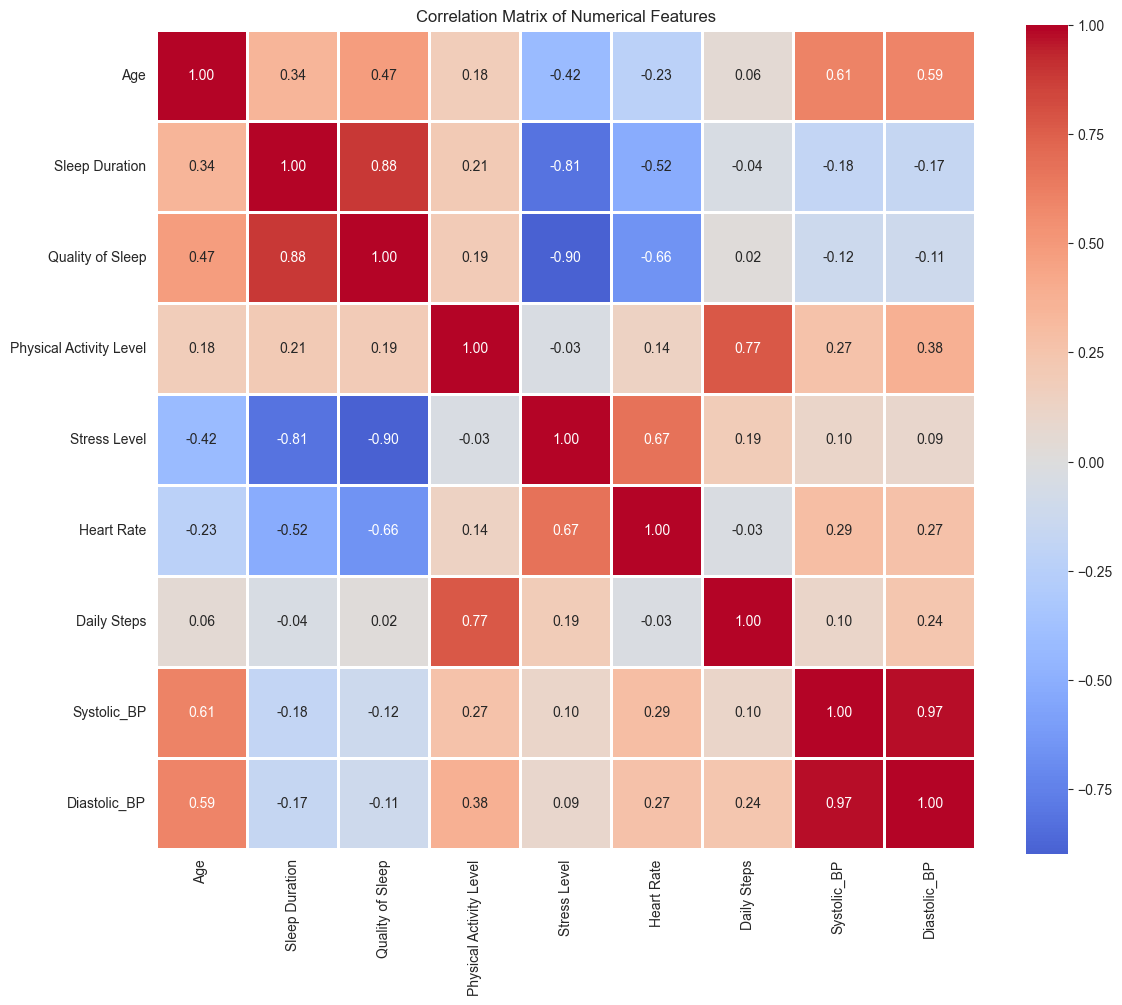


Strong Correlations (|r| > 0.5):
Age <-> Systolic_BP: 0.606
Age <-> Diastolic_BP: 0.594
Sleep Duration <-> Quality of Sleep: 0.883
Sleep Duration <-> Stress Level: -0.811
Sleep Duration <-> Heart Rate: -0.516
Quality of Sleep <-> Stress Level: -0.899
Quality of Sleep <-> Heart Rate: -0.660
Physical Activity Level <-> Daily Steps: 0.773
Stress Level <-> Heart Rate: 0.670
Systolic_BP <-> Diastolic_BP: 0.973


In [66]:
# Correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Identify strong correlations
print("\nStrong Correlations (|r| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

 Bivariate Analysis - Sleep Quality vs Lifestyle Factors

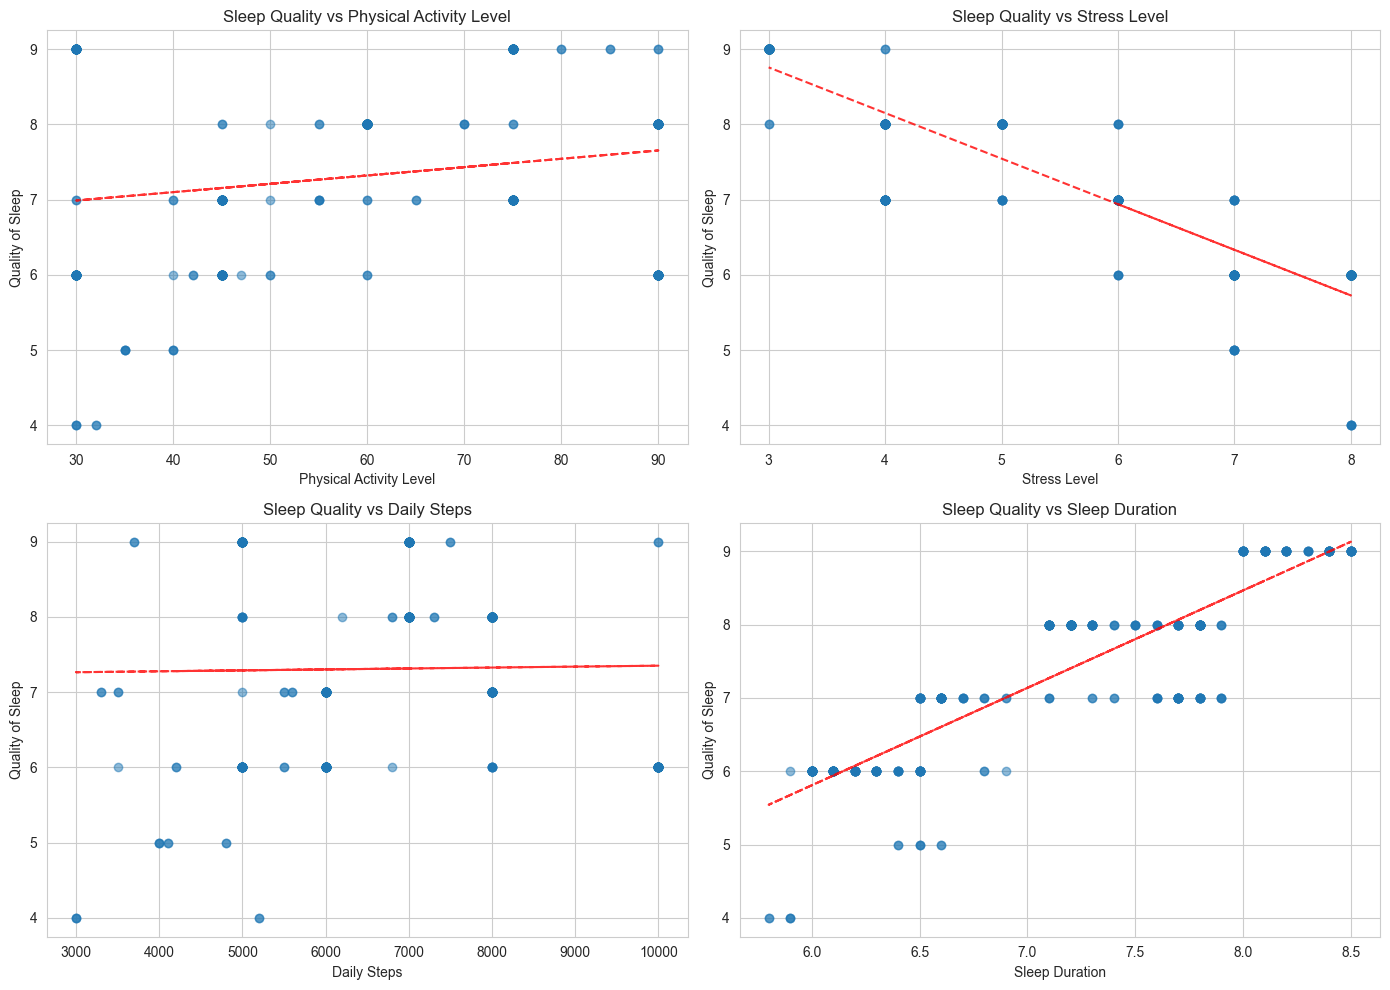

In [67]:
# Analyze relationship between sleep quality and lifestyle factors
lifestyle_factors = ['Physical Activity Level', 'Stress Level', 'Daily Steps', 'Sleep Duration']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, factor in enumerate(lifestyle_factors):
    axes[idx].scatter(df[factor], df['Quality of Sleep'], alpha=0.5)
    axes[idx].set_xlabel(factor)
    axes[idx].set_ylabel('Quality of Sleep')
    axes[idx].set_title(f'Sleep Quality vs {factor}')
    
    # Add trend line
    z = np.polyfit(df[factor], df['Quality of Sleep'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[factor], p(df[factor]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

Sleep Disorder Analysis

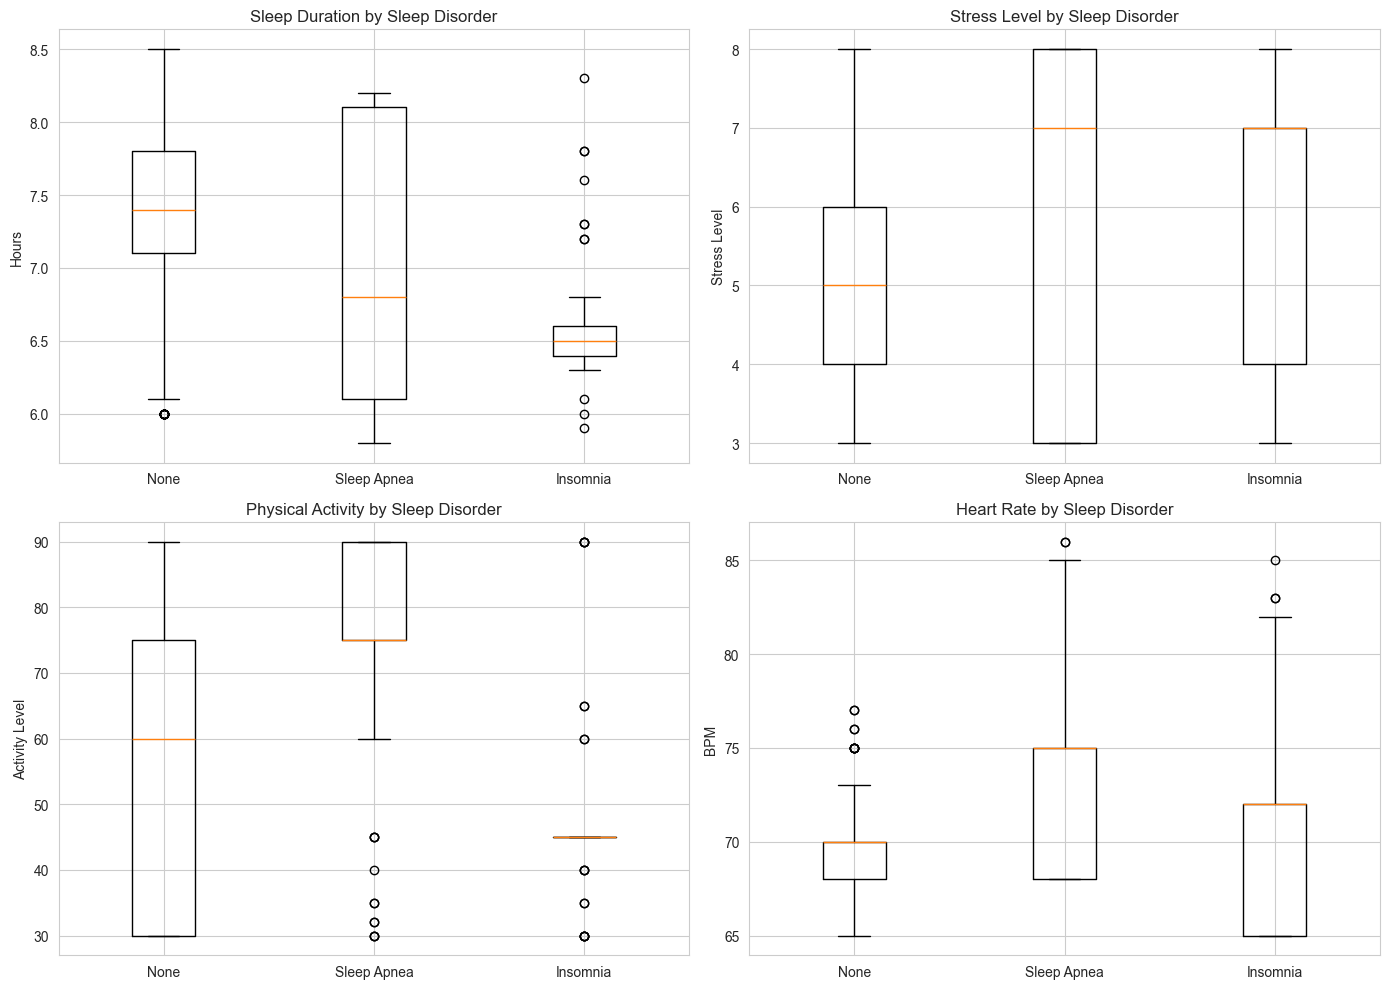

Sleep Disorder Characteristics:
                Sleep Duration  Stress Level  Physical Activity Level  \
Sleep Disorder                                                          
Insomnia              6.589610      5.870130                46.818182   
None                  7.358447      5.114155                57.949772   
Sleep Apnea           7.032051      5.666667                74.794872   

                Heart Rate  
Sleep Disorder              
Insomnia         70.467532  
None             69.018265  
Sleep Apnea      73.089744  


In [68]:
# Analyze characteristics of people with different sleep disorders
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sleep duration by disorder
axes[0, 0].boxplot([df[df['Sleep Disorder'] == disorder]['Sleep Duration'].values 
                     for disorder in df['Sleep Disorder'].unique()],
                    labels=df['Sleep Disorder'].unique())
axes[0, 0].set_title('Sleep Duration by Sleep Disorder')
axes[0, 0].set_ylabel('Hours')

# Stress level by disorder
axes[0, 1].boxplot([df[df['Sleep Disorder'] == disorder]['Stress Level'].values 
                     for disorder in df['Sleep Disorder'].unique()],
                    labels=df['Sleep Disorder'].unique())
axes[0, 1].set_title('Stress Level by Sleep Disorder')
axes[0, 1].set_ylabel('Stress Level')

# Physical activity by disorder
axes[1, 0].boxplot([df[df['Sleep Disorder'] == disorder]['Physical Activity Level'].values 
                     for disorder in df['Sleep Disorder'].unique()],
                    labels=df['Sleep Disorder'].unique())
axes[1, 0].set_title('Physical Activity by Sleep Disorder')
axes[1, 0].set_ylabel('Activity Level')

# Heart rate by disorder
axes[1, 1].boxplot([df[df['Sleep Disorder'] == disorder]['Heart Rate'].values 
                     for disorder in df['Sleep Disorder'].unique()],
                    labels=df['Sleep Disorder'].unique())
axes[1, 1].set_title('Heart Rate by Sleep Disorder')
axes[1, 1].set_ylabel('BPM')

plt.tight_layout()
plt.show()

# Statistical summary
print("Sleep Disorder Characteristics:")
print(df.groupby('Sleep Disorder')[['Sleep Duration', 'Stress Level', 
                                      'Physical Activity Level', 'Heart Rate']].mean())

Outlier Detection and Analysis

In [69]:
# Detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("OUTLIER ANALYSIS")
print("="*50)

for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\n{col}:")
    print(f"  Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")
    print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    if len(outliers) > 0:
        print(f"  Outlier range: [{outliers[col].min():.2f}, {outliers[col].max():.2f}]")

OUTLIER ANALYSIS

Age:
  Lower bound: 13.12, Upper bound: 72.12
  Number of outliers: 0 (0.00%)

Sleep Duration:
  Lower bound: 4.30, Upper bound: 9.90
  Number of outliers: 0 (0.00%)

Quality of Sleep:
  Lower bound: 3.00, Upper bound: 11.00
  Number of outliers: 0 (0.00%)

Physical Activity Level:
  Lower bound: 0.00, Upper bound: 120.00
  Number of outliers: 0 (0.00%)

Stress Level:
  Lower bound: -0.50, Upper bound: 11.50
  Number of outliers: 0 (0.00%)

Heart Rate:
  Lower bound: 62.00, Upper bound: 78.00
  Number of outliers: 15 (4.01%)
  Outlier range: [80.00, 86.00]

Daily Steps:
  Lower bound: 2000.00, Upper bound: 11600.00
  Number of outliers: 0 (0.00%)

Systolic_BP:
  Lower bound: 110.00, Upper bound: 150.00
  Number of outliers: 0 (0.00%)

Diastolic_BP:
  Lower bound: 65.00, Upper bound: 105.00
  Number of outliers: 0 (0.00%)


Visualize Outliers with Box Plots

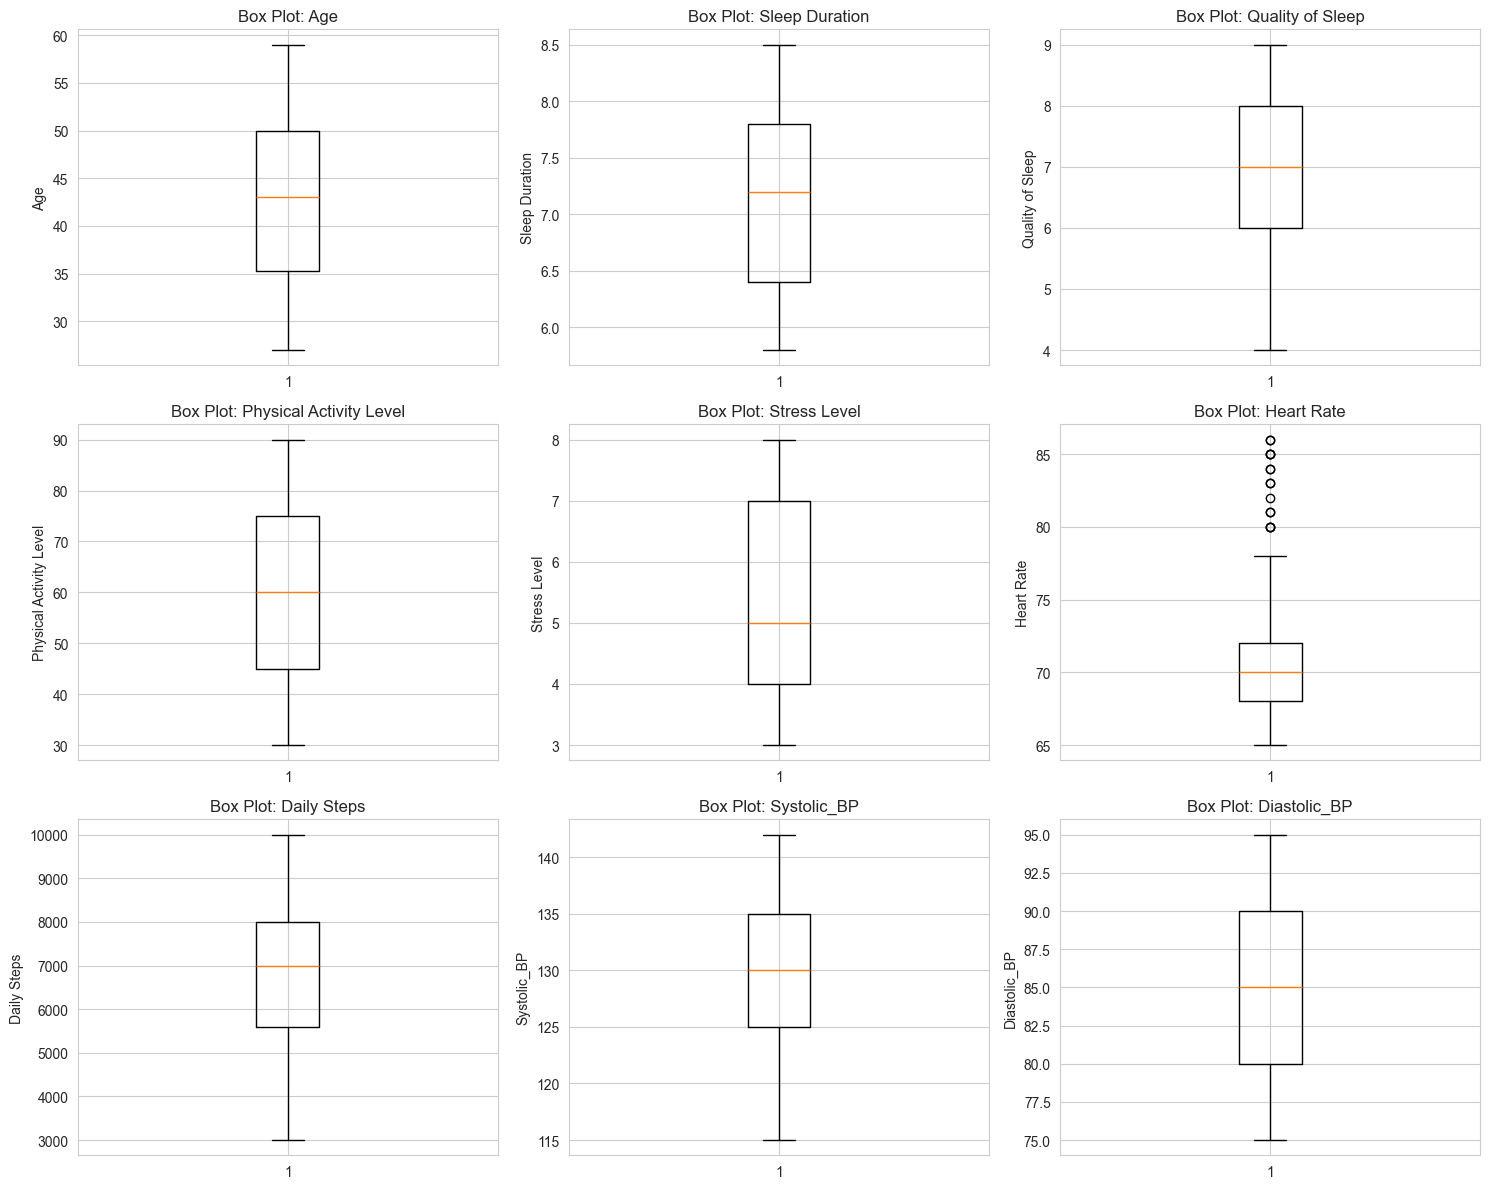

In [70]:
# Box plots to visualize outliers
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col], vert=True)
    axes[idx].set_title(f'Box Plot: {col}')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

Label Encoding for Categorical Variables

In [71]:
# Create a copy of the dataframe for encoding
df_encoded = df.copy()

# Initialize label encoders dictionary to store encoders
label_encoders = {}

# Categorical columns to encode
categorical_to_encode = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

print("LABEL ENCODING")
print("="*50)

for col in categorical_to_encode:
    le = LabelEncoder()
    df_encoded[f'{col}_Encoded'] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    
    # Display mapping
    print(f"\n{col} Encoding Mapping:")
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    for key, value in mapping.items():
        print(f"  {key}: {value}")

print("\nEncoded columns added to dataframe")
print(df_encoded[['Gender', 'Gender_Encoded', 'Occupation', 'Occupation_Encoded']].head())

LABEL ENCODING

Gender Encoding Mapping:
  Female: 0
  Male: 1

Occupation Encoding Mapping:
  Accountant: 0
  Doctor: 1
  Engineer: 2
  Lawyer: 3
  Manager: 4
  Nurse: 5
  Sales Representative: 6
  Salesperson: 7
  Scientist: 8
  Software Engineer: 9
  Teacher: 10

BMI Category Encoding Mapping:
  Normal: 0
  Normal Weight: 1
  Obese: 2
  Overweight: 3

Sleep Disorder Encoding Mapping:
  Insomnia: 0
  None: 1
  Sleep Apnea: 2

Encoded columns added to dataframe
  Gender  Gender_Encoded            Occupation  Occupation_Encoded
0   Male               1     Software Engineer                   9
1   Male               1                Doctor                   1
2   Male               1                Doctor                   1
3   Male               1  Sales Representative                   6
4   Male               1  Sales Representative                   6


Feature Scaling - Standardization (Z-score Normalization)

STANDARDIZATION (Z-SCORE NORMALIZATION)

Original Statistics:
            Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
mean  42.184492        7.132086          7.312834                59.171123   
std    8.673133        0.795657          1.196956                20.830804   

      Stress Level  Heart Rate  Daily Steps  Systolic_BP  Diastolic_BP  
mean      5.385027   70.165775  6816.844920   128.553476     84.649733  
std       1.774526    4.135676  1617.915679     7.748118      6.161611  

Standardized Statistics:
               Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
mean -4.559633e-16    1.348891e-15      2.469801e-16            -3.324732e-17   
std   1.001340e+00    1.001340e+00      1.001340e+00             1.001340e+00   

      Stress Level    Heart Rate   Daily Steps   Systolic_BP  Diastolic_BP  
mean  1.994839e-16 -1.377389e-15 -9.499234e-17 -9.119265e-16 -8.359326e-16  
std   1.001340e+00  1.001340e+00  1.001340e+00  1.001340e+00

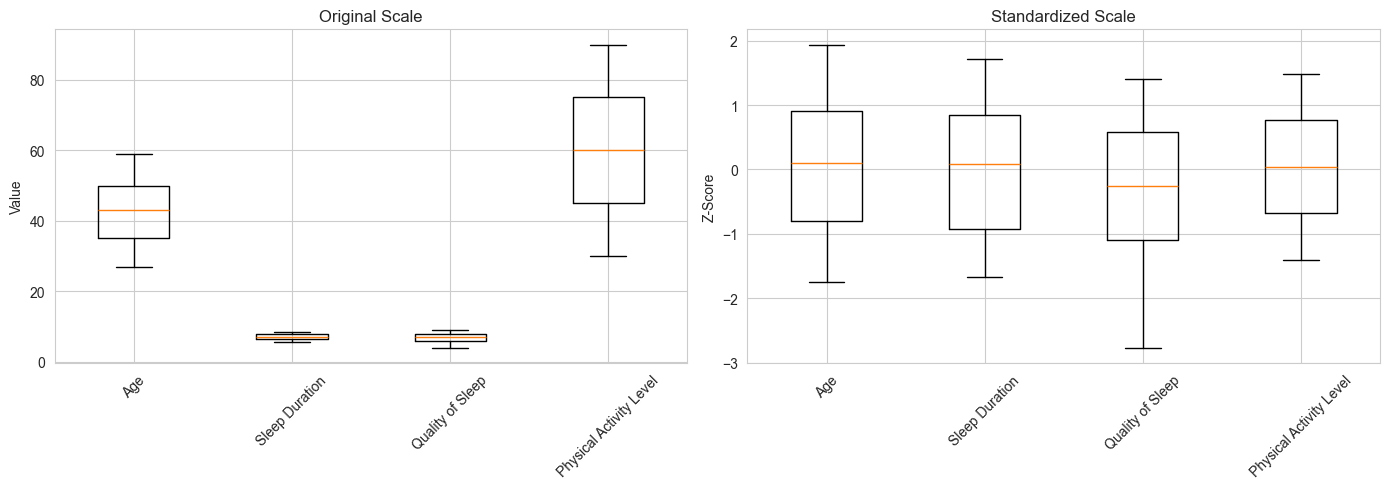

In [72]:
# Standardization: transform features to have mean=0 and std=1
scaler_standard = StandardScaler()

# Select numerical columns for scaling
cols_to_scale = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']

# Create a copy with standardized features
df_standardized = df_encoded.copy()
df_standardized[cols_to_scale] = scaler_standard.fit_transform(df_encoded[cols_to_scale])

print("STANDARDIZATION (Z-SCORE NORMALIZATION)")
print("="*50)
print("\nOriginal Statistics:")
print(df_encoded[cols_to_scale].describe().loc[['mean', 'std']])

print("\nStandardized Statistics:")
print(df_standardized[cols_to_scale].describe().loc[['mean', 'std']])

# Visualize before and after standardization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].boxplot([df_encoded[col] for col in cols_to_scale[:4]], 
                labels=cols_to_scale[:4])
axes[0].set_title('Original Scale')
axes[0].set_ylabel('Value')
axes[0].tick_params(axis='x', rotation=45)

axes[1].boxplot([df_standardized[col] for col in cols_to_scale[:4]], 
                labels=cols_to_scale[:4])
axes[1].set_title('Standardized Scale')
axes[1].set_ylabel('Z-Score')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Feature Scaling - Min-Max Normalization

MIN-MAX NORMALIZATION

Original Range:
     Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
min   27             5.8                 4                       30   
max   59             8.5                 9                       90   

     Stress Level  Heart Rate  Daily Steps  Systolic_BP  Diastolic_BP  
min             3          65         3000          115            75  
max             8          86        10000          142            95  

Normalized Range:
     Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
min  0.0             0.0               0.0                      0.0   
max  1.0             1.0               1.0                      1.0   

     Stress Level  Heart Rate  Daily Steps  Systolic_BP  Diastolic_BP  
min           0.0         0.0          0.0          0.0           0.0  
max           1.0         1.0          1.0          1.0           1.0  


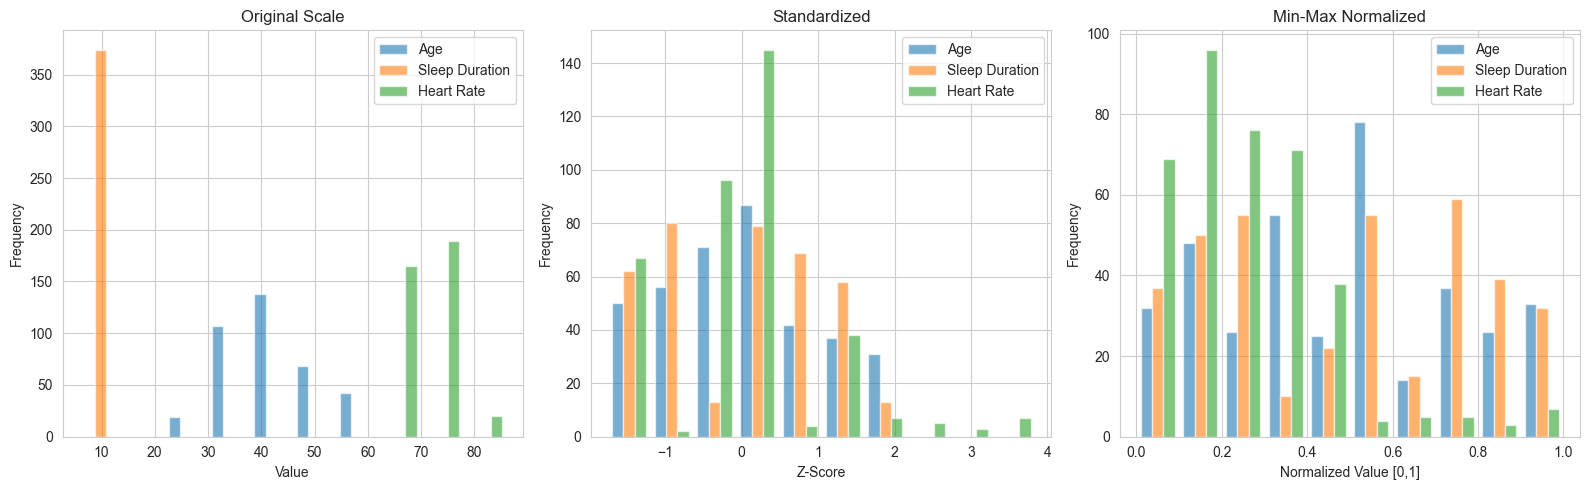

In [73]:
# Min-Max Normalization: scale features to range [0, 1]
scaler_minmax = MinMaxScaler()

# Create a copy with min-max normalized features
df_normalized = df_encoded.copy()
df_normalized[cols_to_scale] = scaler_minmax.fit_transform(df_encoded[cols_to_scale])

print("MIN-MAX NORMALIZATION")
print("="*50)
print("\nOriginal Range:")
print(df_encoded[cols_to_scale].agg(['min', 'max']))

print("\nNormalized Range:")
print(df_normalized[cols_to_scale].agg(['min', 'max']))

# Compare distributions
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Original
axes[0].hist([df_encoded[col] for col in ['Age', 'Sleep Duration', 'Heart Rate']], 
             label=['Age', 'Sleep Duration', 'Heart Rate'], alpha=0.6)
axes[0].set_title('Original Scale')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Standardized
axes[1].hist([df_standardized[col] for col in ['Age', 'Sleep Duration', 'Heart Rate']], 
             label=['Age', 'Sleep Duration', 'Heart Rate'], alpha=0.6)
axes[1].set_title('Standardized')
axes[1].set_xlabel('Z-Score')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Normalized
axes[2].hist([df_normalized[col] for col in ['Age', 'Sleep Duration', 'Heart Rate']], 
             label=['Age', 'Sleep Duration', 'Heart Rate'], alpha=0.6)
axes[2].set_title('Min-Max Normalized')
axes[2].set_xlabel('Normalized Value [0,1]')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.tight_layout()
plt.show()

Log Transformation for Skewed Data

SKEWNESS ANALYSIS

Skewness of numerical features:
Heart Rate                 1.224824
Diastolic_BP               0.378570
Age                        0.257222
Daily Steps                0.178277
Stress Level               0.154330
Physical Activity Level    0.074487
Sleep Duration             0.037554
Systolic_BP               -0.035669
Quality of Sleep          -0.207448
dtype: float64

Interpretation:
  |skewness| < 0.5: fairly symmetric
  0.5 < |skewness| < 1: moderately skewed
  |skewness| > 1: highly skewed

Features with |skewness| > 0.5: ['Heart Rate']


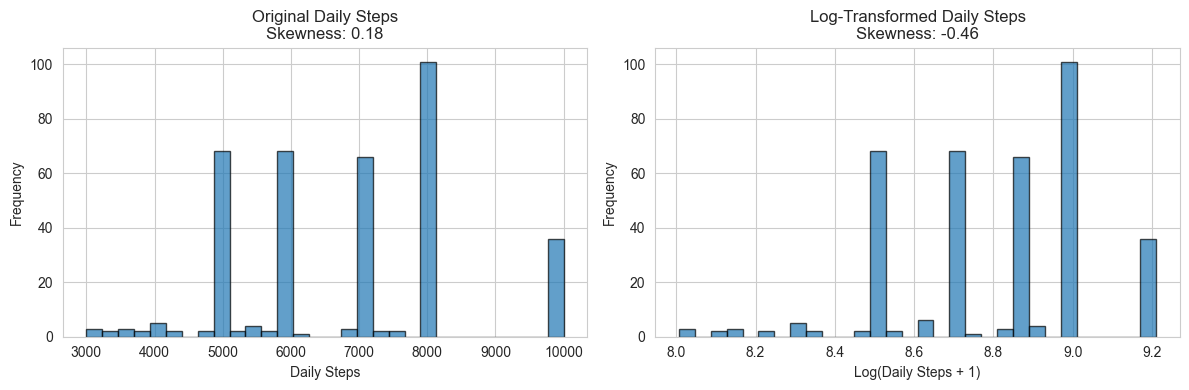

In [74]:
# Check skewness of features
print("SKEWNESS ANALYSIS")
print("="*50)

skewness = df[numerical_cols].skew()
print("\nSkewness of numerical features:")
print(skewness.sort_values(ascending=False))

print("\nInterpretation:")
print("  |skewness| < 0.5: fairly symmetric")
print("  0.5 < |skewness| < 1: moderately skewed")
print("  |skewness| > 1: highly skewed")

# Apply log transformation to highly skewed features
# Daily Steps appears to be a good candidate
highly_skewed = skewness[abs(skewness) > 0.5].index.tolist()
print(f"\nFeatures with |skewness| > 0.5: {highly_skewed}")

# Log transformation example
if 'Daily Steps' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Original distribution
    axes[0].hist(df['Daily Steps'], bins=30, edgecolor='black', alpha=0.7)
    axes[0].set_title(f'Original Daily Steps\nSkewness: {df["Daily Steps"].skew():.2f}')
    axes[0].set_xlabel('Daily Steps')
    axes[0].set_ylabel('Frequency')
    
    # Log-transformed distribution
    df_transformed = df.copy()
    df_transformed['Daily Steps_log'] = np.log1p(df['Daily Steps'])
    axes[1].hist(df_transformed['Daily Steps_log'], bins=30, edgecolor='black', alpha=0.7)
    axes[1].set_title(f'Log-Transformed Daily Steps\nSkewness: {df_transformed["Daily Steps_log"].skew():.2f}')
    axes[1].set_xlabel('Log(Daily Steps + 1)')
    axes[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

Square Root and Power Transformations

In [75]:
# Additional transformation techniques
df_transformed = df.copy()

# Square root transformation for moderately skewed data
df_transformed['Heart Rate_sqrt'] = np.sqrt(df['Heart Rate'])

# Square transformation for left-skewed data
df_transformed['Quality of Sleep_squared'] = df['Quality of Sleep'] ** 2

# Box-Cox transformation (requires positive values)
from scipy.stats import boxcox

# Example with a positive feature
if (df['Physical Activity Level'] > 0).all():
    df_transformed['Physical Activity Level_boxcox'], lambda_param = boxcox(df['Physical Activity Level'])
    print(f"Box-Cox transformation lambda parameter: {lambda_param:.4f}")

print("TRANSFORMATION EXAMPLES")
print("="*50)
print("\nComparison of transformations:")
comparison_df = pd.DataFrame({
    'Original_HR_mean': [df['Heart Rate'].mean()],
    'Sqrt_HR_mean': [df_transformed['Heart Rate_sqrt'].mean()],
    'Original_QoS_mean': [df['Quality of Sleep'].mean()],
    'Squared_QoS_mean': [df_transformed['Quality of Sleep_squared'].mean()]
})
print(comparison_df)

Box-Cox transformation lambda parameter: 0.5867
TRANSFORMATION EXAMPLES

Comparison of transformations:
   Original_HR_mean  Sqrt_HR_mean  Original_QoS_mean  Squared_QoS_mean
0         70.165775      8.372985           7.312834         54.906417


Feature Binning/Discretization

FEATURE BINNING

Age Group Distribution:
Age_Group
<30       32
30-40    133
40-50    133
50-60     76
60+        0
Name: count, dtype: int64

Sleep Category Distribution:
Sleep_Category
Adequate (7-8h)        161
Insufficient (6-7h)    118
Long (>8h)              58
Poor (<6h)              37
Name: count, dtype: int64

Stress Category Distribution:
Stress_Category
Moderate     137
High          96
Low           71
Very High     70
Name: count, dtype: int64


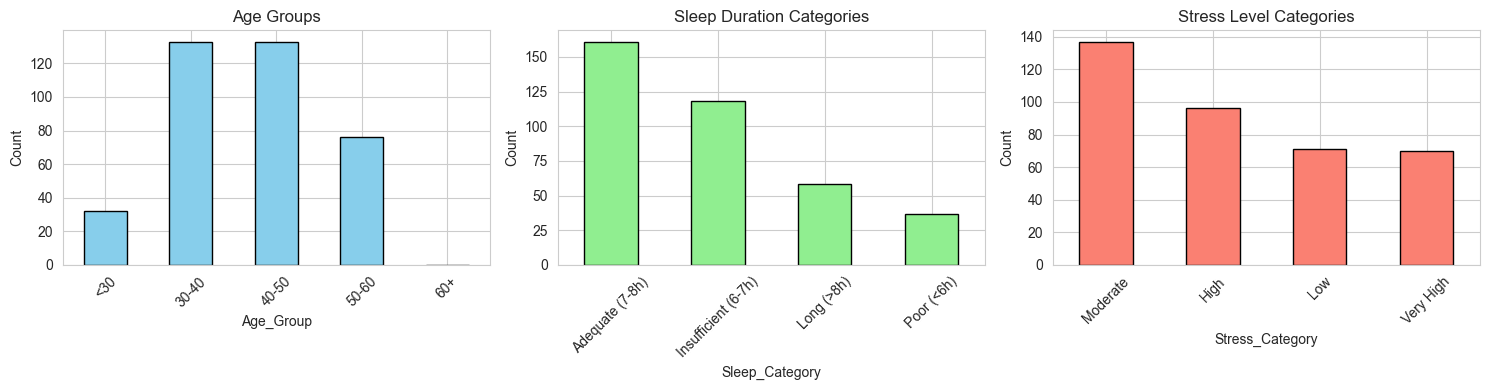

In [76]:
# Create bins for continuous variables
df_binned = df.copy()

# Age groups
df_binned['Age_Group'] = pd.cut(df['Age'], 
                                bins=[0, 30, 40, 50, 60, 100],
                                labels=['<30', '30-40', '40-50', '50-60', '60+'])

# Sleep duration categories
df_binned['Sleep_Category'] = pd.cut(df['Sleep Duration'],
                                     bins=[0, 6, 7, 8, 12],
                                     labels=['Poor (<6h)', 'Insufficient (6-7h)', 
                                            'Adequate (7-8h)', 'Long (>8h)'])

# Stress level categories
df_binned['Stress_Category'] = pd.cut(df['Stress Level'],
                                      bins=[0, 3, 5, 7, 10],
                                      labels=['Low', 'Moderate', 'High', 'Very High'])

print("FEATURE BINNING")
print("="*50)
print("\nAge Group Distribution:")
print(df_binned['Age_Group'].value_counts().sort_index())

print("\nSleep Category Distribution:")
print(df_binned['Sleep_Category'].value_counts())

print("\nStress Category Distribution:")
print(df_binned['Stress_Category'].value_counts())

# Visualize binned features
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

df_binned['Age_Group'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Age Groups')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

df_binned['Sleep_Category'].value_counts().plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('Sleep Duration Categories')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

df_binned['Stress_Category'].value_counts().plot(kind='bar', ax=axes[2], color='salmon', edgecolor='black')
axes[2].set_title('Stress Level Categories')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Feature Creation and Engineering

FEATURE ENGINEERING

New Features Created:
       Sleep_Efficiency  Activity_Stress_Ratio  CV_Health_Score  Sleep_Deficit
count        374.000000             374.000000       374.000000     374.000000
mean           5.299465              10.028022         3.045515       0.867914
std            1.393220               4.429424         0.226654       0.795657
min            2.320000               3.333333         2.654762      -0.500000
25%            3.795000               6.785714         2.857143       0.200000
50%            5.460000              10.000000         3.071429       0.800000
75%            6.160000              12.000000         3.153846       1.600000
max            7.650000              22.500000         3.461538       2.200000


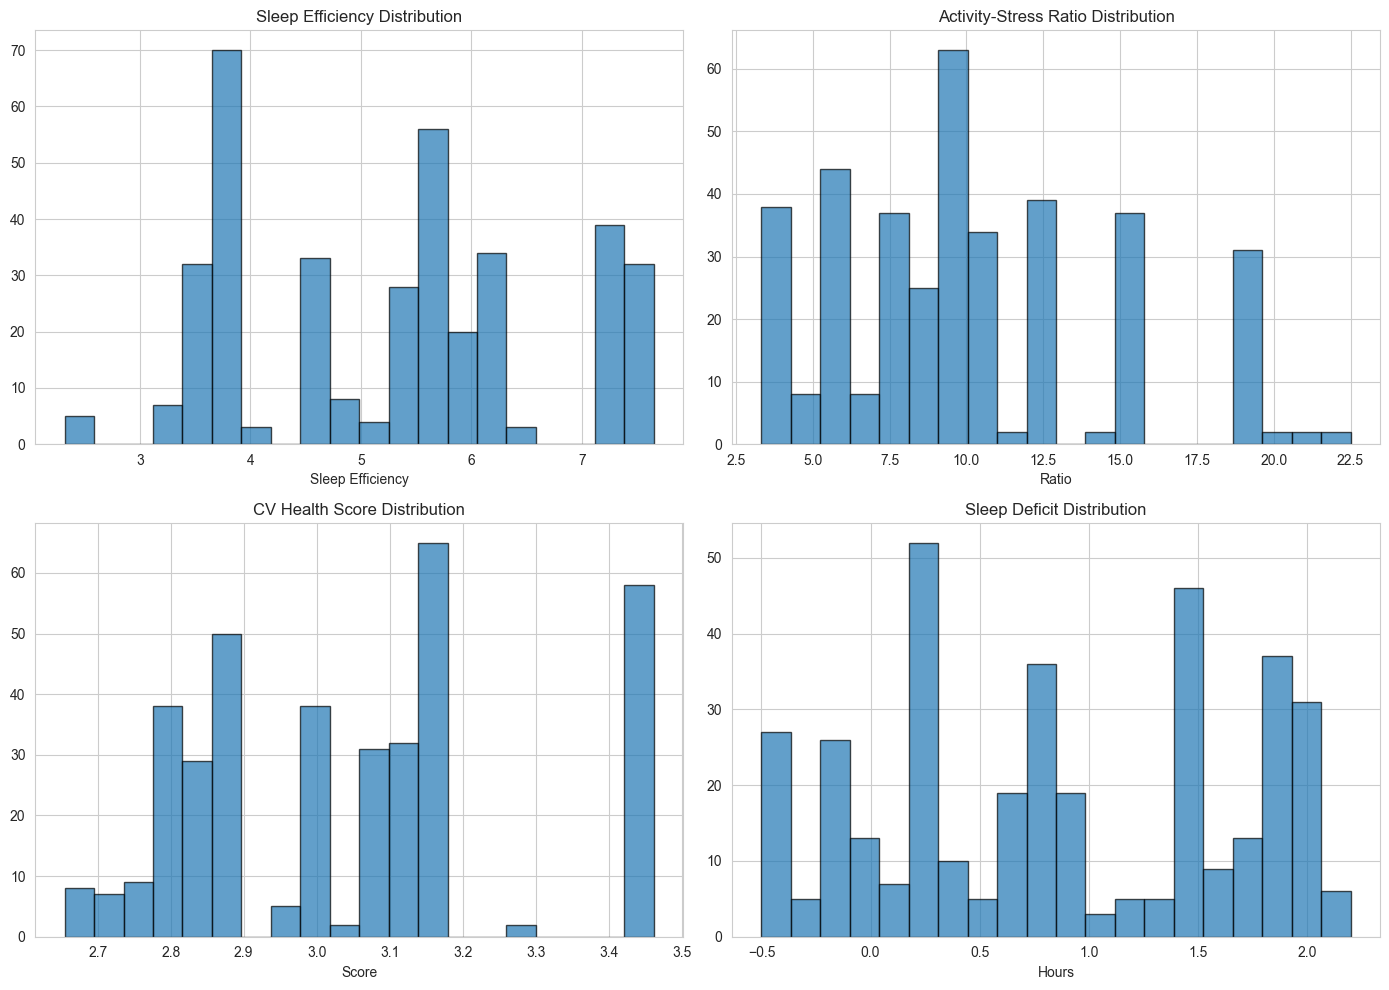

In [77]:
# Create new meaningful features
df_featured = df.copy()

# BMI calculation (if height/weight were available, but we'll use category)
# Create a numerical BMI category score
bmi_mapping = {'Normal': 0, 'Normal Weight': 0, 'Overweight': 1, 'Obese': 2}
df_featured['BMI_Score'] = df_featured['BMI Category'].map(bmi_mapping)

# Sleep efficiency score combining duration and quality
df_featured['Sleep_Efficiency'] = (df_featured['Sleep Duration'] * df_featured['Quality of Sleep']) / 10

# Activity-Stress balance
df_featured['Activity_Stress_Ratio'] = df_featured['Physical Activity Level'] / (df_featured['Stress Level'] + 1)

# Cardiovascular health indicator
df_featured['CV_Health_Score'] = (df_featured['Systolic_BP'] + df_featured['Diastolic_BP']) / df_featured['Heart Rate']

# Sleep deficit indicator
df_featured['Sleep_Deficit'] = 8 - df_featured['Sleep Duration']

print("FEATURE ENGINEERING")
print("="*50)
print("\nNew Features Created:")
new_features = ['Sleep_Efficiency', 'Activity_Stress_Ratio', 'CV_Health_Score', 'Sleep_Deficit']
print(df_featured[new_features].describe())

# Visualize engineered features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(df_featured['Sleep_Efficiency'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Sleep Efficiency Distribution')
axes[0, 0].set_xlabel('Sleep Efficiency')

axes[0, 1].hist(df_featured['Activity_Stress_Ratio'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Activity-Stress Ratio Distribution')
axes[0, 1].set_xlabel('Ratio')

axes[1, 0].hist(df_featured['CV_Health_Score'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('CV Health Score Distribution')
axes[1, 0].set_xlabel('Score')

axes[1, 1].hist(df_featured['Sleep_Deficit'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Sleep Deficit Distribution')
axes[1, 1].set_xlabel('Hours')

plt.tight_layout()
plt.show()

Advanced Visualization - Pair Plots

<Figure size 1500x1500 with 0 Axes>

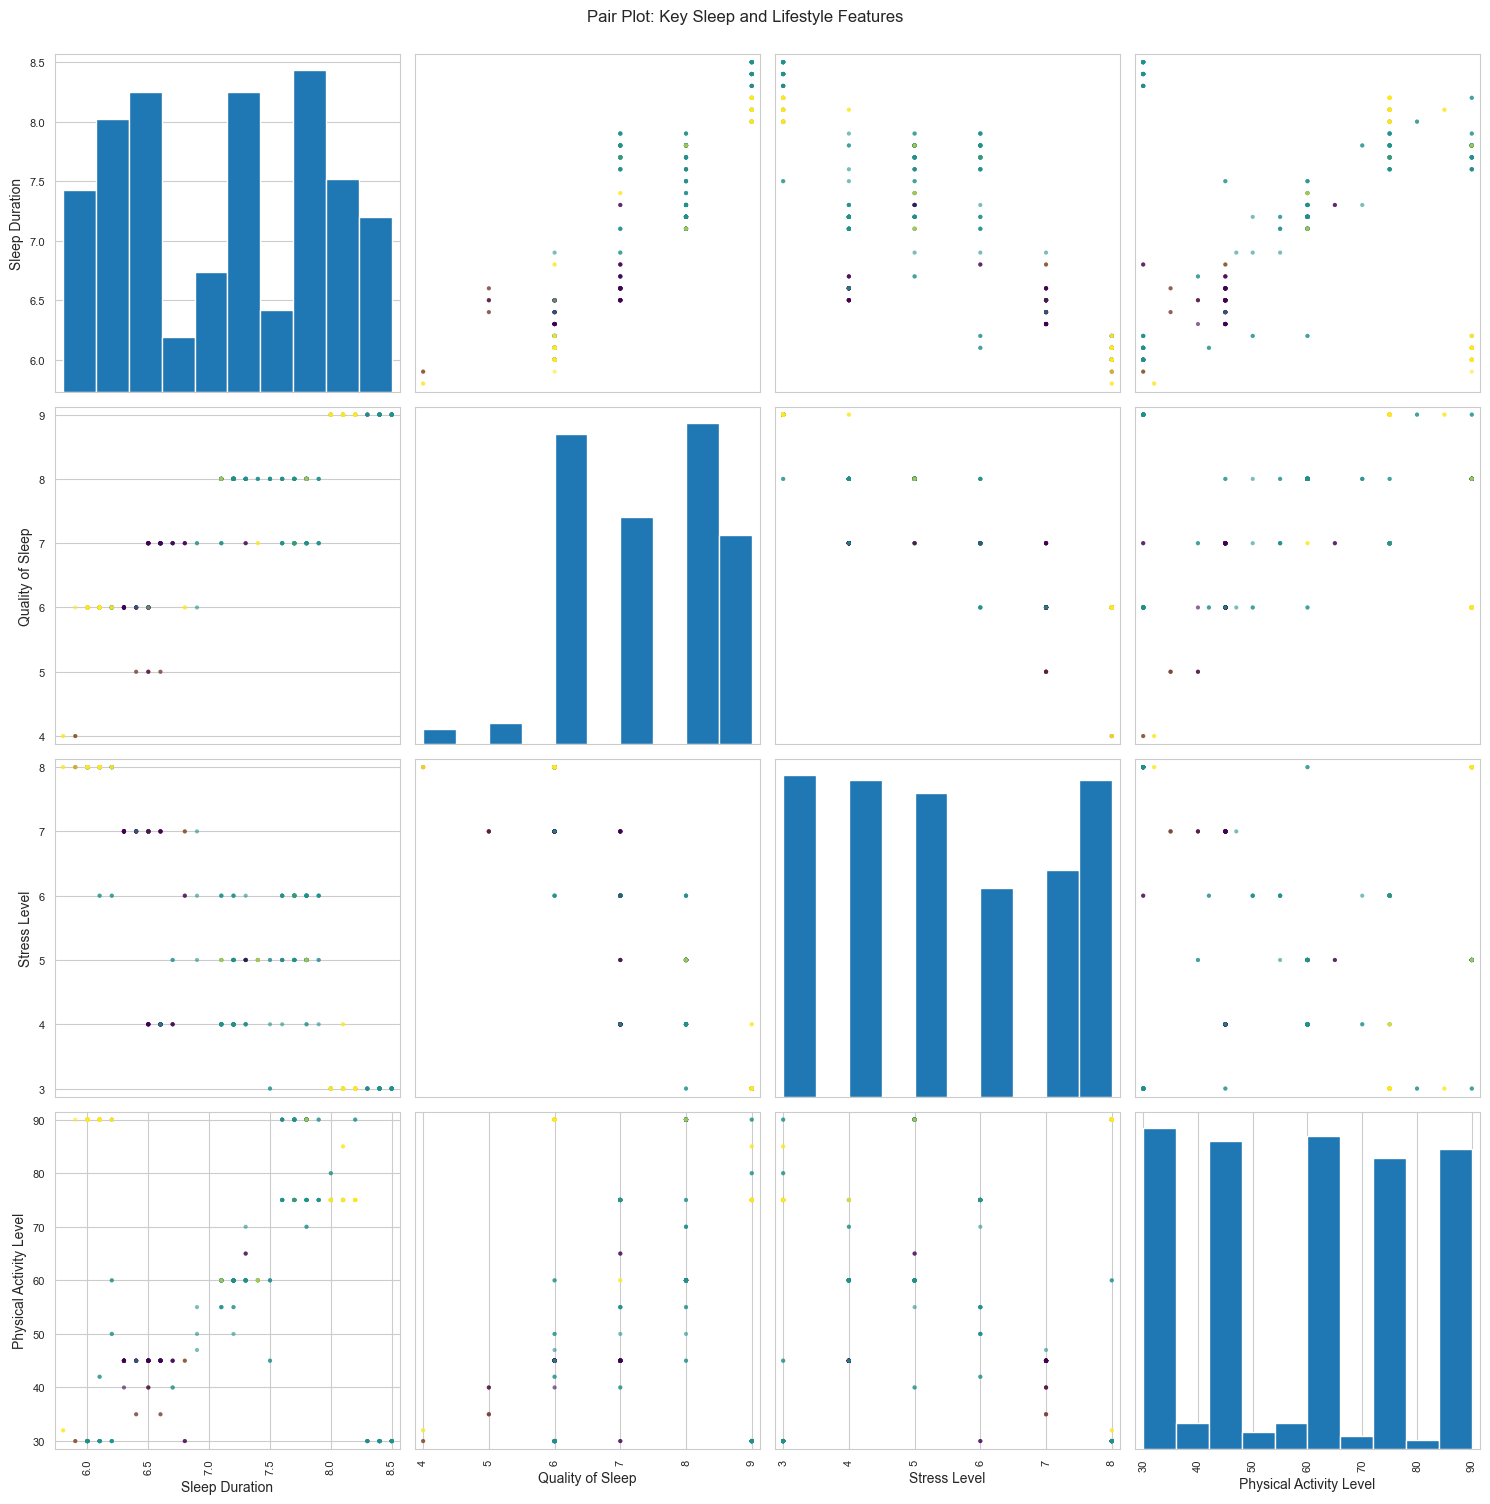

Pair plot shows relationships between all key features


In [78]:
# Pair plot for key relationships
from pandas.plotting import scatter_matrix

key_features = ['Sleep Duration', 'Quality of Sleep', 'Stress Level', 
                'Physical Activity Level', 'Sleep Disorder']

# Create pair plot with color coding by sleep disorder
sleep_subset = df[key_features].copy()

fig = plt.figure(figsize=(15, 15))
scatter_matrix(sleep_subset.drop('Sleep Disorder', axis=1), 
               figsize=(15, 15), 
               alpha=0.6, 
               diagonal='hist',
               c=df['Sleep Disorder'].astype('category').cat.codes,
               cmap='viridis')
plt.suptitle('Pair Plot: Key Sleep and Lifestyle Features', y=1.0)
plt.tight_layout()
plt.show()

print("Pair plot shows relationships between all key features")

Violin Plots for Distribution Comparison

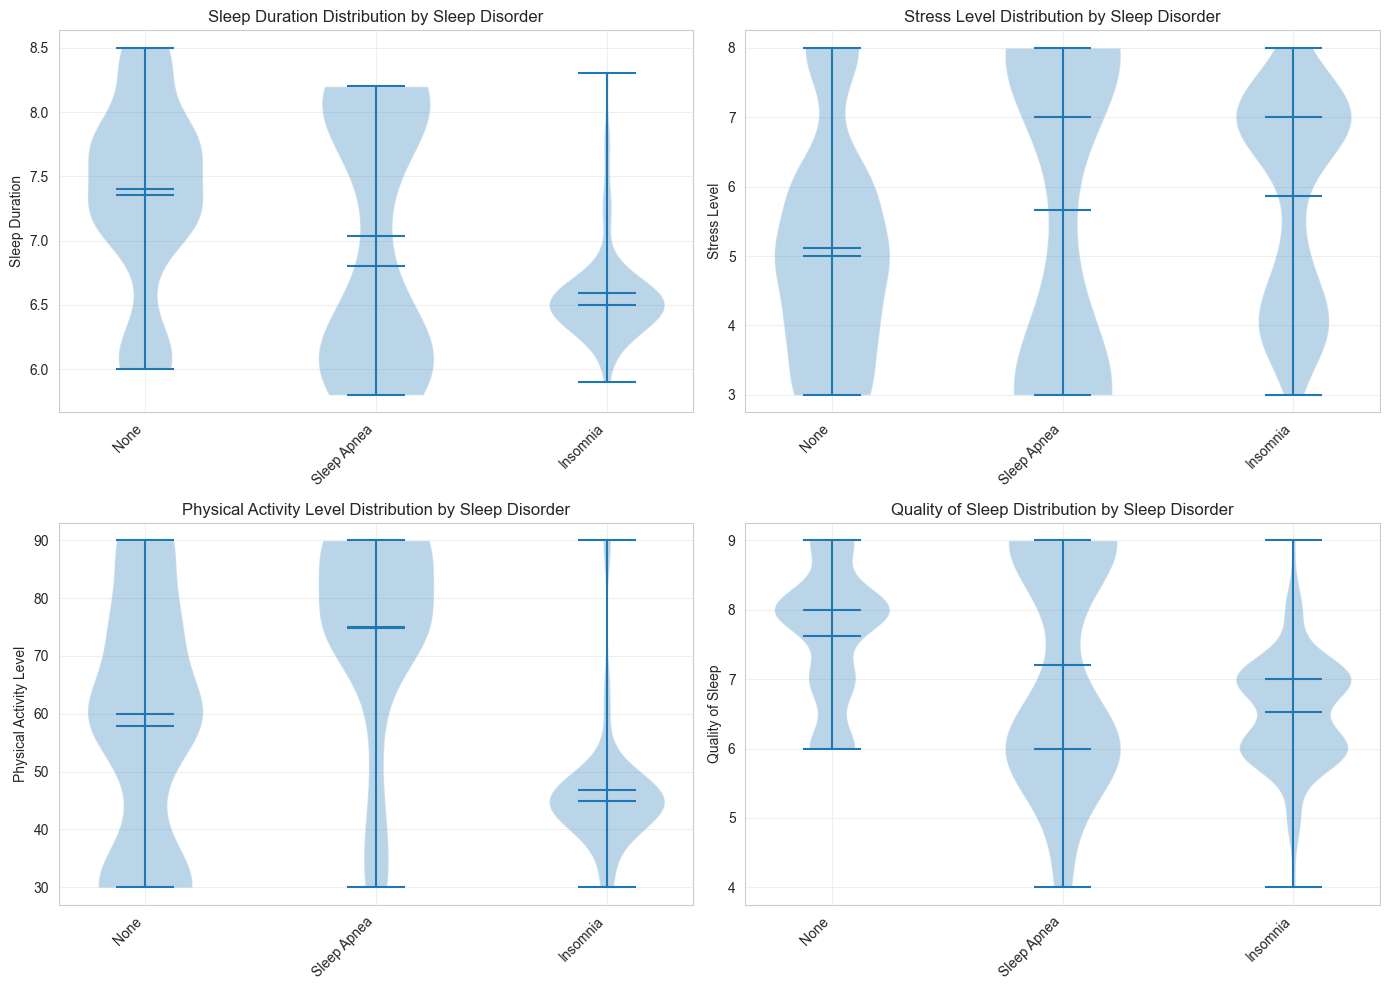

In [79]:
# Violin plots to show distribution by sleep disorder
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

features_to_plot = ['Sleep Duration', 'Stress Level', 'Physical Activity Level', 'Quality of Sleep']

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx // 2, idx % 2]
    
    # Create violin plot
    disorder_types = df['Sleep Disorder'].unique()
    data_to_plot = [df[df['Sleep Disorder'] == disorder][feature].values 
                    for disorder in disorder_types]
    
    parts = ax.violinplot(data_to_plot, positions=range(len(disorder_types)), 
                          showmeans=True, showmedians=True)
    
    ax.set_xticks(range(len(disorder_types)))
    ax.set_xticklabels(disorder_types, rotation=45, ha='right')
    ax.set_ylabel(feature)
    ax.set_title(f'{feature} Distribution by Sleep Disorder')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Sleep Disorder vs Demographics

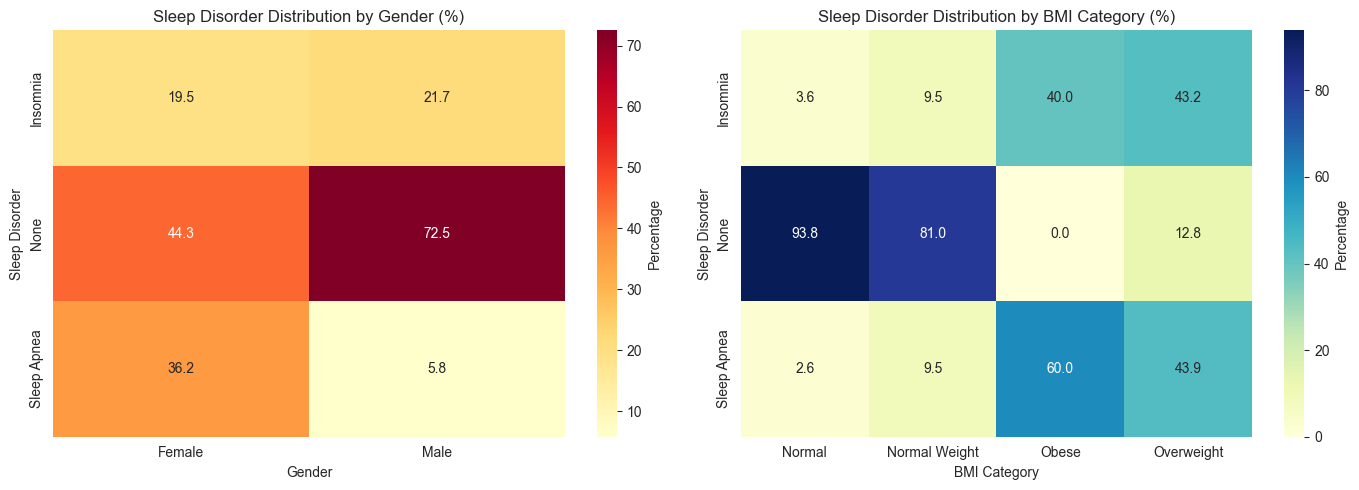


Cross-tabulation: Sleep Disorder vs Gender (counts)
Gender          Female  Male
Sleep Disorder              
Insomnia            36    41
None                82   137
Sleep Apnea         67    11

Cross-tabulation: Sleep Disorder vs BMI Category (counts)
BMI Category    Normal  Normal Weight  Obese  Overweight
Sleep Disorder                                          
Insomnia             7              2      4          64
None               183             17      0          19
Sleep Apnea          5              2      6          65


In [80]:
# Create cross-tabulation heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sleep disorder by gender
disorder_gender = pd.crosstab(df['Sleep Disorder'], df['Gender'], normalize='columns') * 100
sns.heatmap(disorder_gender, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[0], cbar_kws={'label': 'Percentage'})
axes[0].set_title('Sleep Disorder Distribution by Gender (%)')
axes[0].set_ylabel('Sleep Disorder')

# Sleep disorder by BMI category
disorder_bmi = pd.crosstab(df['Sleep Disorder'], df['BMI Category'], normalize='columns') * 100
sns.heatmap(disorder_bmi, annot=True, fmt='.1f', cmap='YlGnBu', ax=axes[1], cbar_kws={'label': 'Percentage'})
axes[1].set_title('Sleep Disorder Distribution by BMI Category (%)')
axes[1].set_ylabel('Sleep Disorder')

plt.tight_layout()
plt.show()

print("\nCross-tabulation: Sleep Disorder vs Gender (counts)")
print(pd.crosstab(df['Sleep Disorder'], df['Gender']))
print("\nCross-tabulation: Sleep Disorder vs BMI Category (counts)")
print(pd.crosstab(df['Sleep Disorder'], df['BMI Category']))

Occupation Analysis Visualization

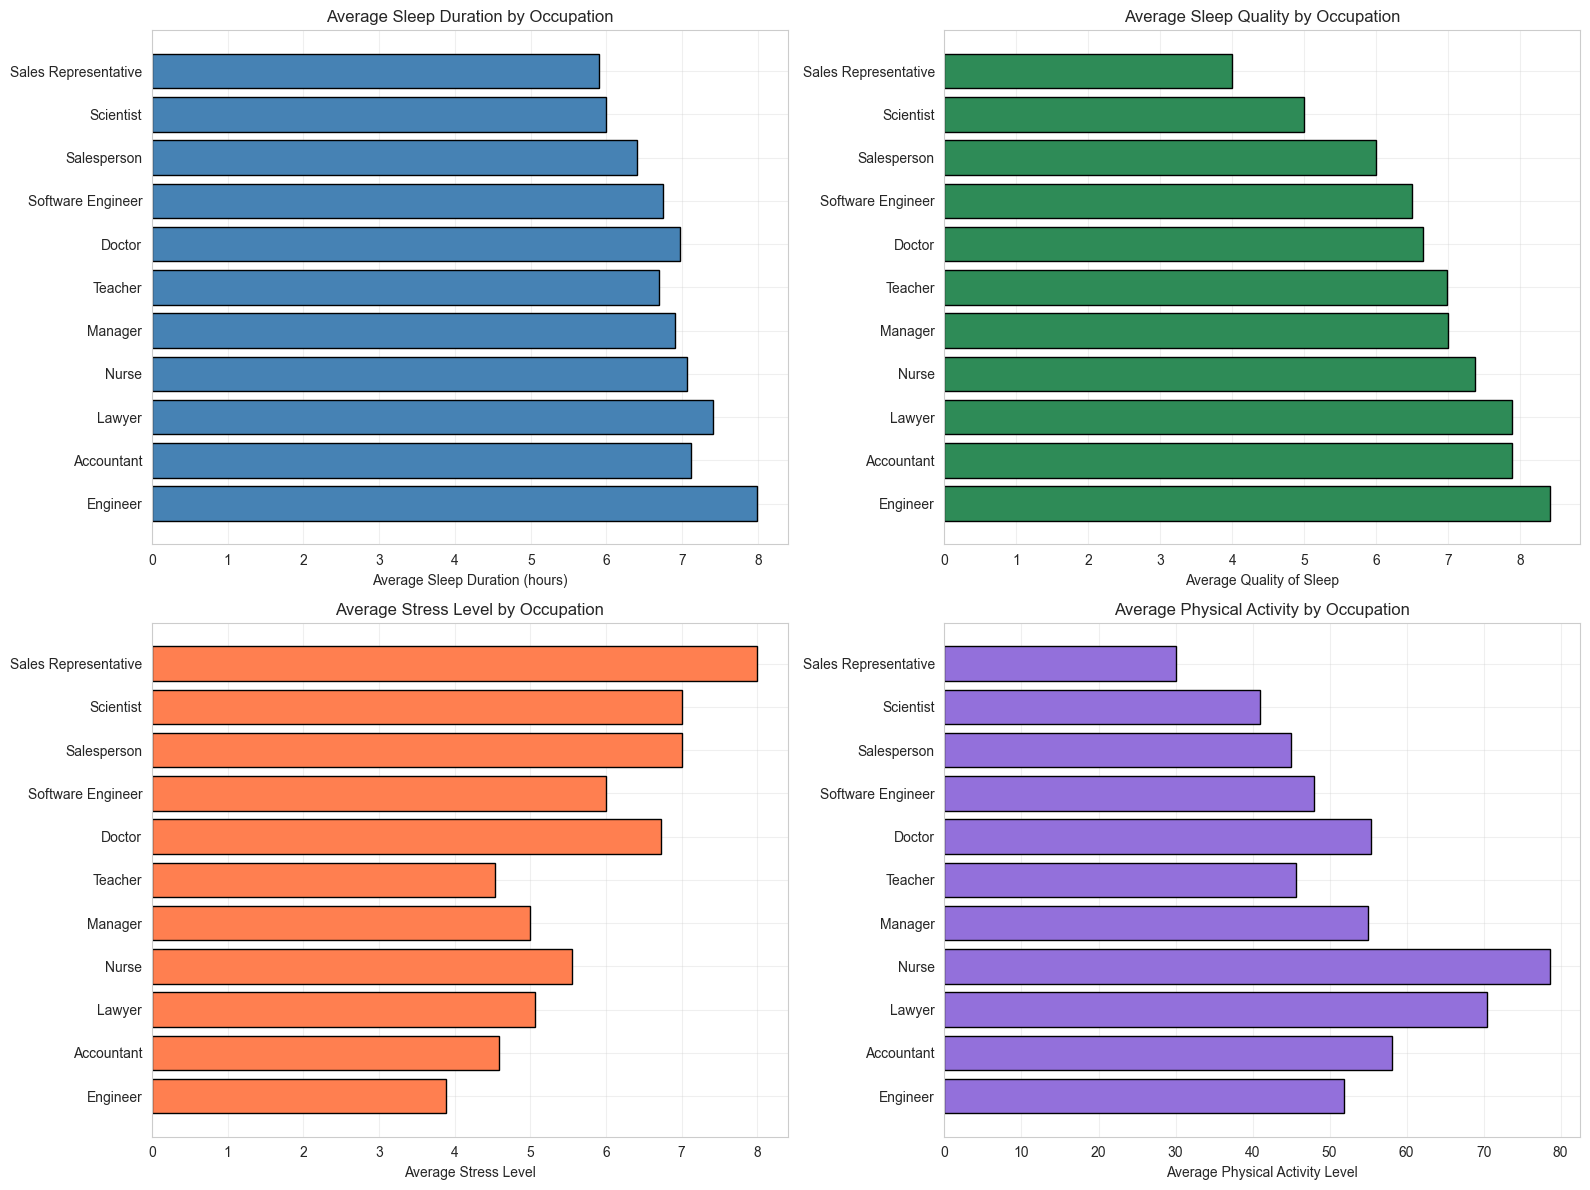


Occupation Statistics:
                      Sleep Duration  Quality of Sleep  Stress Level  \
Occupation                                                             
Engineer                        7.99              8.41          3.89   
Accountant                      7.11              7.89          4.59   
Lawyer                          7.41              7.89          5.06   
Nurse                           7.06              7.37          5.55   
Manager                         6.90              7.00          5.00   
Teacher                         6.69              6.98          4.53   
Doctor                          6.97              6.65          6.73   
Software Engineer               6.75              6.50          6.00   
Salesperson                     6.40              6.00          7.00   
Scientist                       6.00              5.00          7.00   
Sales Representative            5.90              4.00          8.00   

                      Physical Activity

In [81]:
# Analyze occupation impact on sleep
occupation_stats = df.groupby('Occupation').agg({
    'Sleep Duration': 'mean',
    'Quality of Sleep': 'mean',
    'Stress Level': 'mean',
    'Physical Activity Level': 'mean'
}).round(2)

occupation_stats = occupation_stats.sort_values('Quality of Sleep', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Sleep duration by occupation
axes[0, 0].barh(occupation_stats.index, occupation_stats['Sleep Duration'], color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('Average Sleep Duration (hours)')
axes[0, 0].set_title('Average Sleep Duration by Occupation')
axes[0, 0].grid(True, alpha=0.3)

# Quality of sleep by occupation
axes[0, 1].barh(occupation_stats.index, occupation_stats['Quality of Sleep'], color='seagreen', edgecolor='black')
axes[0, 1].set_xlabel('Average Quality of Sleep')
axes[0, 1].set_title('Average Sleep Quality by Occupation')
axes[0, 1].grid(True, alpha=0.3)

# Stress level by occupation
axes[1, 0].barh(occupation_stats.index, occupation_stats['Stress Level'], color='coral', edgecolor='black')
axes[1, 0].set_xlabel('Average Stress Level')
axes[1, 0].set_title('Average Stress Level by Occupation')
axes[1, 0].grid(True, alpha=0.3)

# Physical activity by occupation
axes[1, 1].barh(occupation_stats.index, occupation_stats['Physical Activity Level'], color='mediumpurple', edgecolor='black')
axes[1, 1].set_xlabel('Average Physical Activity Level')
axes[1, 1].set_title('Average Physical Activity by Occupation')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nOccupation Statistics:")
print(occupation_stats)

Age-Based Analysis

AGE GROUP ANALYSIS
        Sleep Duration       Quality of Sleep       Stress Level        \
                  mean   std             mean   std         mean   std   
Age_Bin                                                                  
20-30             6.92  0.85             6.16  0.99         6.84  0.92   
30-40             7.03  0.59             7.30  0.99         5.46  1.53   
40-50             6.78  0.66             6.81  0.89         5.99  1.55   
50-60             8.02  0.64             8.70  0.80         3.58  1.44   
60+                NaN   NaN              NaN   NaN          NaN   NaN   

        Heart Rate        
              mean   std  
Age_Bin                   
20-30        73.44  5.29  
30-40        69.90  3.31  
40-50        71.20  4.31  
50-60        67.45  2.74  
60+            NaN   NaN  


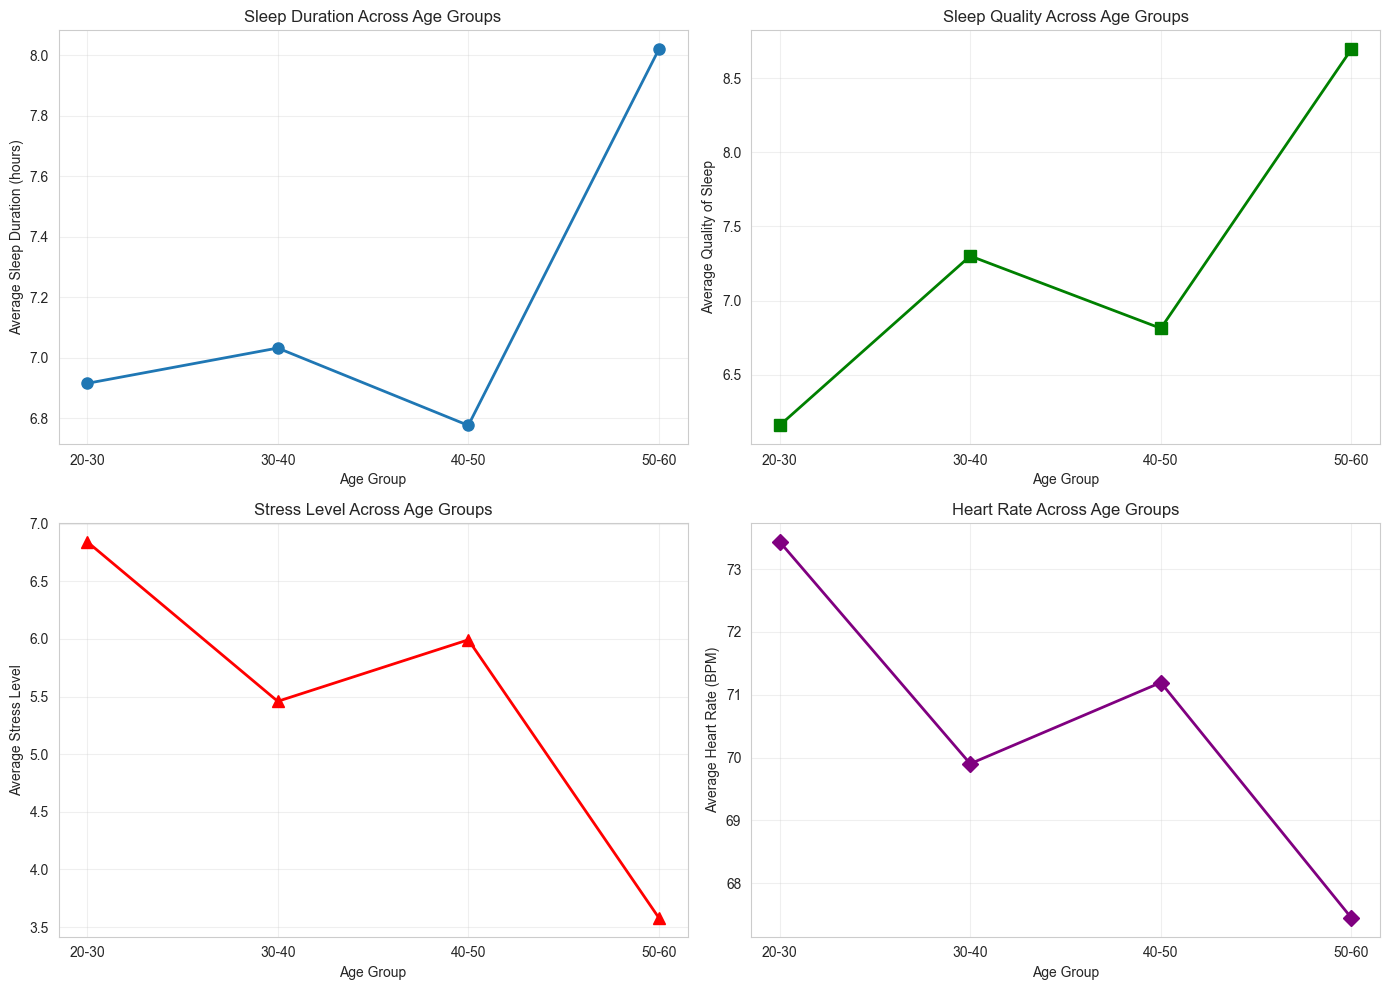

In [82]:
# Analyze trends across age groups
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60+']
df['Age_Bin'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

age_analysis = df.groupby('Age_Bin').agg({
    'Sleep Duration': ['mean', 'std'],
    'Quality of Sleep': ['mean', 'std'],
    'Stress Level': ['mean', 'std'],
    'Heart Rate': ['mean', 'std']
}).round(2)

print("AGE GROUP ANALYSIS")
print("="*50)
print(age_analysis)

# Visualize age trends
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

age_groups = df.groupby('Age_Bin')

# Sleep duration by age
age_sleep = age_groups['Sleep Duration'].mean()
axes[0, 0].plot(age_sleep.index, age_sleep.values, marker='o', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Average Sleep Duration (hours)')
axes[0, 0].set_title('Sleep Duration Across Age Groups')
axes[0, 0].grid(True, alpha=0.3)

# Sleep quality by age
age_quality = age_groups['Quality of Sleep'].mean()
axes[0, 1].plot(age_quality.index, age_quality.values, marker='s', linewidth=2, markersize=8, color='green')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Average Quality of Sleep')
axes[0, 1].set_title('Sleep Quality Across Age Groups')
axes[0, 1].grid(True, alpha=0.3)

# Stress level by age
age_stress = age_groups['Stress Level'].mean()
axes[1, 0].plot(age_stress.index, age_stress.values, marker='^', linewidth=2, markersize=8, color='red')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Average Stress Level')
axes[1, 0].set_title('Stress Level Across Age Groups')
axes[1, 0].grid(True, alpha=0.3)

# Heart rate by age
age_hr = age_groups['Heart Rate'].mean()
axes[1, 1].plot(age_hr.index, age_hr.values, marker='D', linewidth=2, markersize=8, color='purple')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Average Heart Rate (BPM)')
axes[1, 1].set_title('Heart Rate Across Age Groups')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Multi-Dimensional Analysis with Bubble Charts

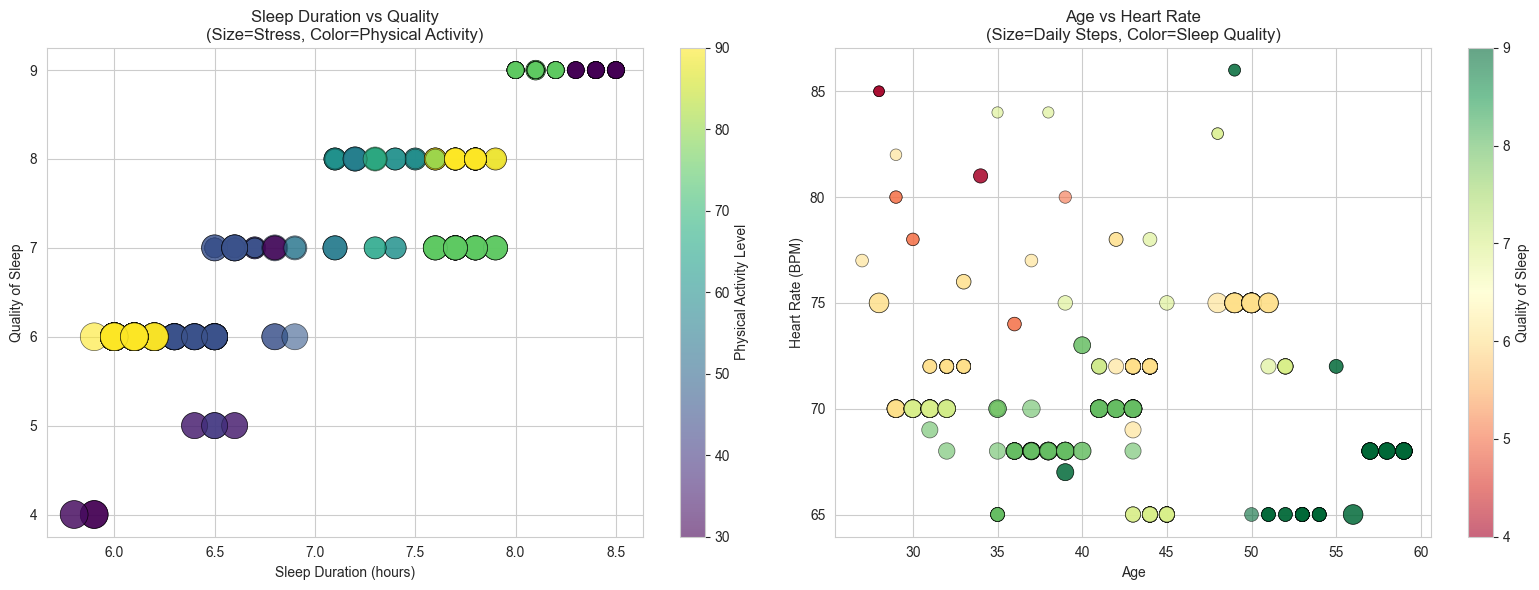

In [83]:
# Bubble chart showing multiple dimensions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bubble chart 1: Sleep duration vs quality, sized by stress
scatter1 = axes[0].scatter(df['Sleep Duration'], 
                          df['Quality of Sleep'],
                          s=df['Stress Level']*50,
                          c=df['Physical Activity Level'],
                          cmap='viridis',
                          alpha=0.6,
                          edgecolors='black',
                          linewidth=0.5)
axes[0].set_xlabel('Sleep Duration (hours)')
axes[0].set_ylabel('Quality of Sleep')
axes[0].set_title('Sleep Duration vs Quality\n(Size=Stress, Color=Physical Activity)')
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Physical Activity Level')

# Bubble chart 2: Age vs heart rate, sized by steps
scatter2 = axes[1].scatter(df['Age'],
                          df['Heart Rate'],
                          s=df['Daily Steps']/50,
                          c=df['Quality of Sleep'],
                          cmap='RdYlGn',
                          alpha=0.6,
                          edgecolors='black',
                          linewidth=0.5)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Heart Rate (BPM)')
axes[1].set_title('Age vs Heart Rate\n(Size=Daily Steps, Color=Sleep Quality)')
cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Quality of Sleep')

plt.tight_layout()
plt.show()

Radar Chart for Sleep Disorder Profiles

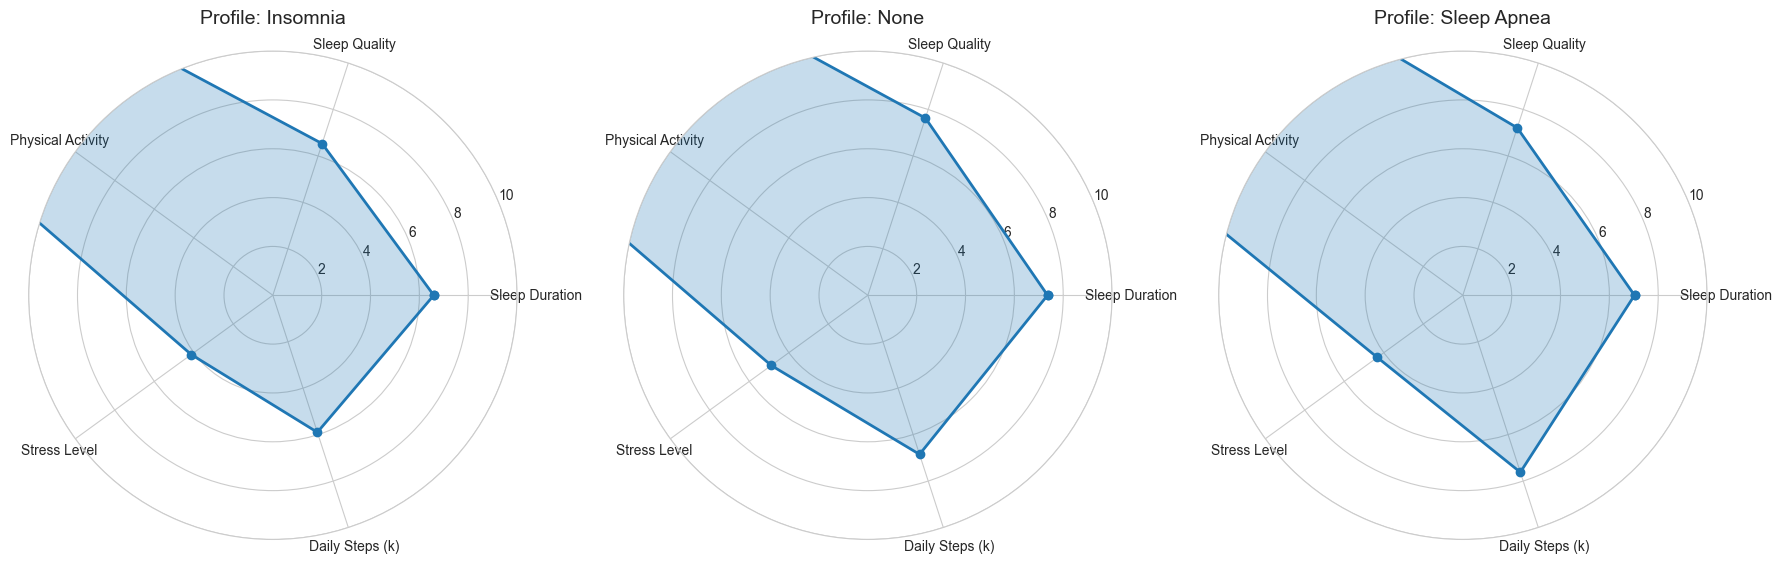


Sleep Disorder Profiles (Mean Values):
                Sleep Duration  Sleep Quality  Physical Activity  \
Sleep Disorder                                                     
Insomnia                  6.59           6.53              46.82   
None                      7.36           7.63              57.95   
Sleep Apnea               7.03           7.21              74.79   

                Stress Level  Daily Steps (k)  
Sleep Disorder                                 
Insomnia                4.13             5.90  
None                    4.89             6.85  
Sleep Apnea             4.33             7.62  


In [84]:
# Create radar charts to profile different sleep disorders
from math import pi

# Calculate mean values for each disorder
disorder_profiles = df.groupby('Sleep Disorder').agg({
    'Sleep Duration': 'mean',
    'Quality of Sleep': 'mean',
    'Physical Activity Level': 'mean',
    'Stress Level': 'mean',
    'Daily Steps': lambda x: x.mean()/1000
}).round(2)

# Rename for clarity
disorder_profiles.columns = ['Sleep Duration', 'Sleep Quality', 'Physical Activity', 
                             'Stress Level', 'Daily Steps (k)']

# Invert stress level so higher is better
disorder_profiles['Stress Level'] = 10 - disorder_profiles['Stress Level']

# Create radar chart
categories = list(disorder_profiles.columns)
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(projection='polar'))

for idx, (disorder, ax) in enumerate(zip(disorder_profiles.index, axes)):
    values = disorder_profiles.loc[disorder].values.flatten().tolist()
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, label=disorder)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=10)
    ax.set_ylim(0, 10)
    ax.set_title(f'Profile: {disorder}', size=14, pad=20)
    ax.grid(True)

plt.tight_layout()
plt.show()

print("\nSleep Disorder Profiles (Mean Values):")
print(disorder_profiles)

Time Series Style Analysis (Simulated Trends)

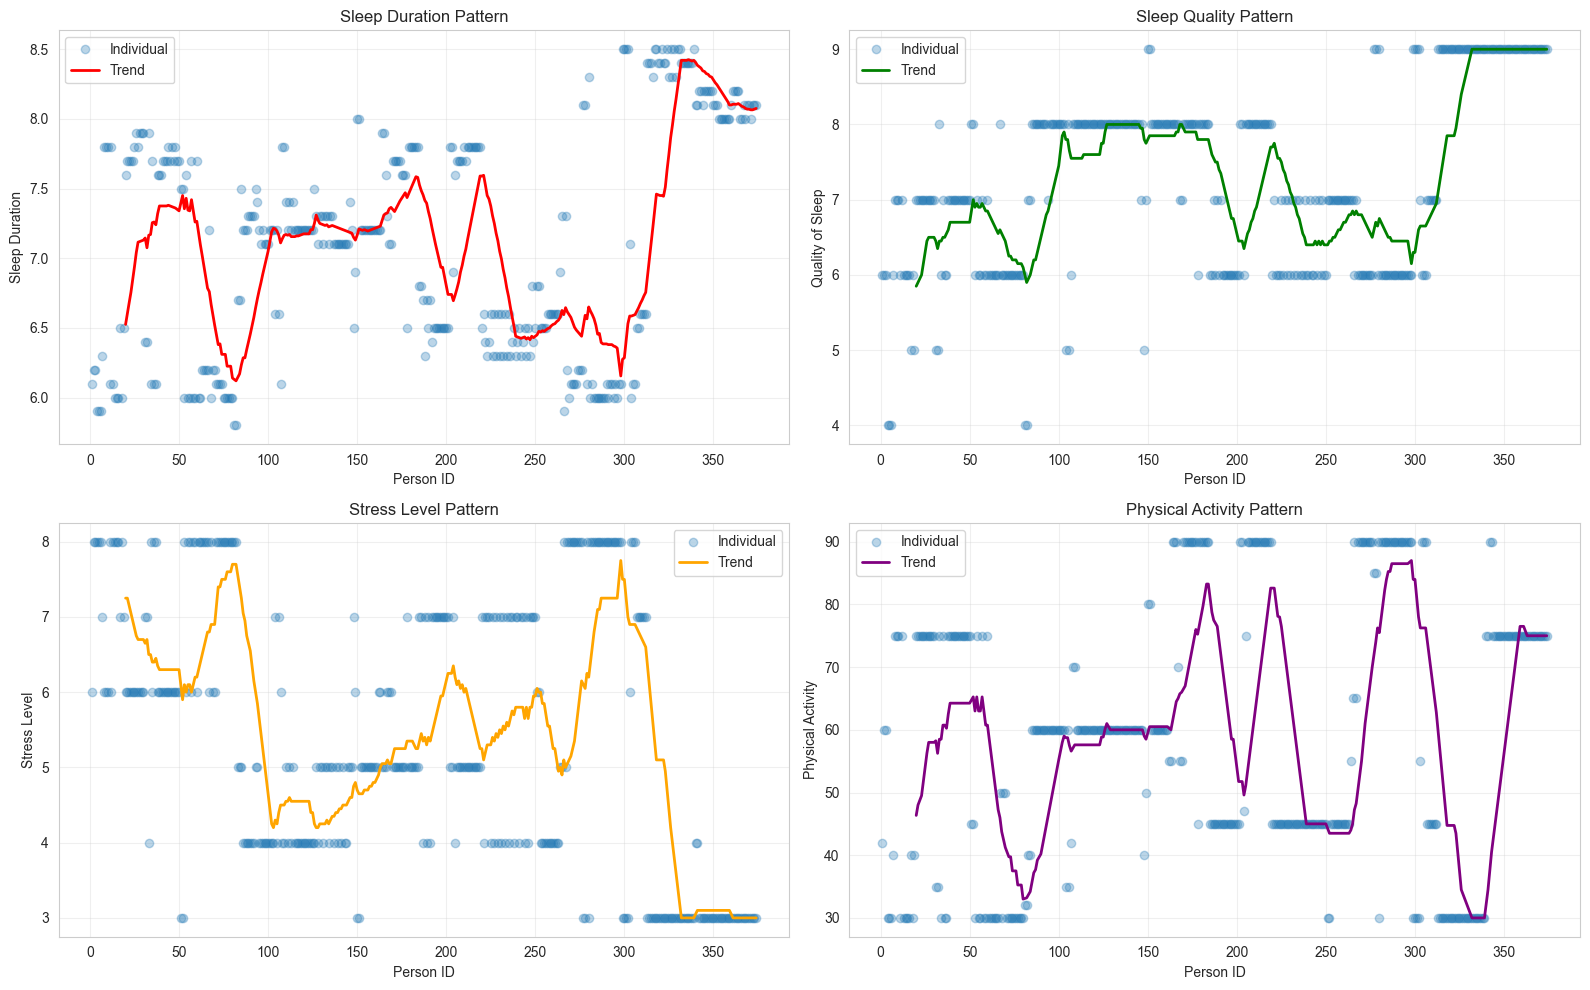

In [85]:
# Analyze trends by person ID as proxy for temporal analysis
# Sort by person ID and analyze patterns

df_sorted = df.sort_values('Person ID')

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Rolling averages to show trends
window_size = 20

df_sorted['Sleep_Duration_MA'] = df_sorted['Sleep Duration'].rolling(window=window_size).mean()
df_sorted['Quality_MA'] = df_sorted['Quality of Sleep'].rolling(window=window_size).mean()
df_sorted['Stress_MA'] = df_sorted['Stress Level'].rolling(window=window_size).mean()
df_sorted['Activity_MA'] = df_sorted['Physical Activity Level'].rolling(window=window_size).mean()

# Plot rolling averages
axes[0, 0].plot(df_sorted['Person ID'], df_sorted['Sleep Duration'], 'o', alpha=0.3, label='Individual')
axes[0, 0].plot(df_sorted['Person ID'], df_sorted['Sleep_Duration_MA'], 'r-', linewidth=2, label='Trend')
axes[0, 0].set_xlabel('Person ID')
axes[0, 0].set_ylabel('Sleep Duration')
axes[0, 0].set_title('Sleep Duration Pattern')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(df_sorted['Person ID'], df_sorted['Quality of Sleep'], 'o', alpha=0.3, label='Individual')
axes[0, 1].plot(df_sorted['Person ID'], df_sorted['Quality_MA'], 'g-', linewidth=2, label='Trend')
axes[0, 1].set_xlabel('Person ID')
axes[0, 1].set_ylabel('Quality of Sleep')
axes[0, 1].set_title('Sleep Quality Pattern')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(df_sorted['Person ID'], df_sorted['Stress Level'], 'o', alpha=0.3, label='Individual')
axes[1, 0].plot(df_sorted['Person ID'], df_sorted['Stress_MA'], 'orange', linewidth=2, label='Trend')
axes[1, 0].set_xlabel('Person ID')
axes[1, 0].set_ylabel('Stress Level')
axes[1, 0].set_title('Stress Level Pattern')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(df_sorted['Person ID'], df_sorted['Physical Activity Level'], 'o', alpha=0.3, label='Individual')
axes[1, 1].plot(df_sorted['Person ID'], df_sorted['Activity_MA'], 'purple', linewidth=2, label='Trend')
axes[1, 1].set_xlabel('Person ID')
axes[1, 1].set_ylabel('Physical Activity')
axes[1, 1].set_title('Physical Activity Pattern')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Interactive Visualization Preparation - Plotly Example

In [86]:
# Install plotly if not already installed
# pip install plotly

import plotly.express as px
import plotly.graph_objects as go

# Create interactive scatter plot
fig = px.scatter(df, 
                 x='Physical Activity Level', 
                 y='Quality of Sleep',
                 size='Daily Steps',
                 color='Sleep Disorder',
                 hover_data=['Age', 'Occupation', 'Stress Level', 'Sleep Duration'],
                 title='Interactive: Physical Activity vs Sleep Quality',
                 labels={'Physical Activity Level': 'Physical Activity Level',
                        'Quality of Sleep': 'Quality of Sleep'},
                 size_max=20)

fig.update_layout(height=600, width=1000)
fig.show()

Statistical Summary Report

In [87]:
# Generate comprehensive statistical report
print("="*70)
print("COMPREHENSIVE STATISTICAL SUMMARY REPORT")
print("="*70)

print("\n1. DATASET OVERVIEW")
print("-" * 70)
print(f"Total Records: {len(df)}")
print(f"Total Features: {df.shape[1]}")
print(f"Date Range: N/A (cross-sectional data)")
print(f"Missing Values: {df.isnull().sum().sum()}")

print("\n2. DEMOGRAPHIC DISTRIBUTION")
print("-" * 70)
print(f"Gender: Male={len(df[df['Gender']=='Male'])}, Female={len(df[df['Gender']=='Female'])}")
print(f"Age Range: {df['Age'].min()}-{df['Age'].max()} years")
print(f"Mean Age: {df['Age'].mean():.1f} ± {df['Age'].std():.1f} years")

print("\n3. SLEEP METRICS")
print("-" * 70)
print(f"Average Sleep Duration: {df['Sleep Duration'].mean():.2f} ± {df['Sleep Duration'].std():.2f} hours")
print(f"Average Sleep Quality: {df['Quality of Sleep'].mean():.2f} ± {df['Quality of Sleep'].std():.2f}")
print(f"Sleep Disorder Prevalence: {(len(df[df['Sleep Disorder']!='None'])/len(df)*100):.1f}%")

print("\n4. LIFESTYLE FACTORS")
print("-" * 70)
print(f"Average Physical Activity: {df['Physical Activity Level'].mean():.1f} ± {df['Physical Activity Level'].std():.1f}")
print(f"Average Stress Level: {df['Stress Level'].mean():.1f} ± {df['Stress Level'].std():.1f}")
print(f"Average Daily Steps: {df['Daily Steps'].mean():.0f} ± {df['Daily Steps'].std():.0f}")

print("\n5. HEALTH INDICATORS")
print("-" * 70)
print(f"Average Heart Rate: {df['Heart Rate'].mean():.1f} ± {df['Heart Rate'].std():.1f} BPM")
print(f"Average Systolic BP: {df['Systolic_BP'].mean():.1f} ± {df['Systolic_BP'].std():.1f} mmHg")
print(f"Average Diastolic BP: {df['Diastolic_BP'].mean():.1f} ± {df['Diastolic_BP'].std():.1f} mmHg")

print("\n6. KEY CORRELATIONS")
print("-" * 70)
sleep_quality_corr = df[numerical_cols].corr()['Quality of Sleep'].sort_values(ascending=False)
print("Top correlations with Sleep Quality:")
for feature, corr in sleep_quality_corr.items():
    if feature != 'Quality of Sleep':
        print(f"  {feature}: {corr:.3f}")

print("\n" + "="*70)

COMPREHENSIVE STATISTICAL SUMMARY REPORT

1. DATASET OVERVIEW
----------------------------------------------------------------------
Total Records: 374
Total Features: 16
Date Range: N/A (cross-sectional data)
Missing Values: 0

2. DEMOGRAPHIC DISTRIBUTION
----------------------------------------------------------------------
Gender: Male=189, Female=185
Age Range: 27-59 years
Mean Age: 42.2 ± 8.7 years

3. SLEEP METRICS
----------------------------------------------------------------------
Average Sleep Duration: 7.13 ± 0.80 hours
Average Sleep Quality: 7.31 ± 1.20
Sleep Disorder Prevalence: 41.4%

4. LIFESTYLE FACTORS
----------------------------------------------------------------------
Average Physical Activity: 59.2 ± 20.8
Average Stress Level: 5.4 ± 1.8
Average Daily Steps: 6817 ± 1618

5. HEALTH INDICATORS
----------------------------------------------------------------------
Average Heart Rate: 70.2 ± 4.1 BPM
Average Systolic BP: 128.6 ± 7.7 mmHg
Average Diastolic BP: 84.6 ± 6.

Prepare Clean Dataset for Streamlit

In [88]:
# Create final clean dataset with all transformations
df_final = df.copy()

# Add all engineered features
df_final['Sleep_Efficiency'] = (df_final['Sleep Duration'] * df_final['Quality of Sleep']) / 10
df_final['Activity_Stress_Ratio'] = df_final['Physical Activity Level'] / (df_final['Stress Level'] + 1)
df_final['Sleep_Deficit'] = 8 - df_final['Sleep Duration']

# Add binned features
df_final['Age_Group'] = pd.cut(df_final['Age'], 
                               bins=[0, 30, 40, 50, 60, 100],
                               labels=['<30', '30-40', '40-50', '50-60', '60+'])

df_final['Sleep_Category'] = pd.cut(df_final['Sleep Duration'],
                                    bins=[0, 6, 7, 8, 12],
                                    labels=['Poor (<6h)', 'Insufficient (6-7h)', 
                                           'Adequate (7-8h)', 'Long (>8h)'])

df_final['Stress_Category'] = pd.cut(df_final['Stress Level'],
                                     bins=[0, 3, 5, 7, 10],
                                     labels=['Low', 'Moderate', 'High', 'Very High'])

print("FINAL DATASET PREPARATION")
print("="*50)
print(f"Final dataset shape: {df_final.shape}")
print(f"\nColumns in final dataset: {len(df_final.columns)}")
print("\nColumn list:")
print(df_final.columns.tolist())

FINAL DATASET PREPARATION
Final dataset shape: (374, 22)

Columns in final dataset: 22

Column list:
['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder', 'Systolic_BP', 'Diastolic_BP', 'Age_Bin', 'Sleep_Efficiency', 'Activity_Stress_Ratio', 'Sleep_Deficit', 'Age_Group', 'Sleep_Category', 'Stress_Category']


Create Encoded Dataset for Machine Learning

In [89]:
# Create ML-ready dataset with all numerical features
df_ml = df.copy()

# Encode categorical variables
le_gender = LabelEncoder()
le_occupation = LabelEncoder()
le_bmi = LabelEncoder()
le_disorder = LabelEncoder()

df_ml['Gender_Encoded'] = le_gender.fit_transform(df_ml['Gender'])
df_ml['Occupation_Encoded'] = le_occupation.fit_transform(df_ml['Occupation'])
df_ml['BMI_Encoded'] = le_bmi.fit_transform(df_ml['BMI Category'])
df_ml['Disorder_Encoded'] = le_disorder.fit_transform(df_ml['Sleep Disorder'])

# Add engineered features
df_ml['Sleep_Efficiency'] = (df_ml['Sleep Duration'] * df_ml['Quality of Sleep']) / 10
df_ml['Activity_Stress_Ratio'] = df_ml['Physical Activity Level'] / (df_ml['Stress Level'] + 1)
df_ml['Sleep_Deficit'] = 8 - df_ml['Sleep Duration']

# Select only numerical columns for ML
ml_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
               'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP',
               'Gender_Encoded', 'Occupation_Encoded', 'BMI_Encoded', 'Disorder_Encoded',
               'Sleep_Efficiency', 'Activity_Stress_Ratio', 'Sleep_Deficit']

df_ml_features = df_ml[ml_features]

print("MACHINE LEARNING DATASET")
print("="*50)
print(f"ML dataset shape: {df_ml_features.shape}")
print("\nML Features:")
for i, col in enumerate(df_ml_features.columns, 1):
    print(f"  {i}. {col}")

print("\nData types:")
print(df_ml_features.dtypes)

print("\nFirst few rows:")
print(df_ml_features.head())

MACHINE LEARNING DATASET
ML dataset shape: (374, 16)

ML Features:
  1. Age
  2. Sleep Duration
  3. Quality of Sleep
  4. Physical Activity Level
  5. Stress Level
  6. Heart Rate
  7. Daily Steps
  8. Systolic_BP
  9. Diastolic_BP
  10. Gender_Encoded
  11. Occupation_Encoded
  12. BMI_Encoded
  13. Disorder_Encoded
  14. Sleep_Efficiency
  15. Activity_Stress_Ratio
  16. Sleep_Deficit

Data types:
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
Heart Rate                   int64
Daily Steps                  int64
Systolic_BP                  int64
Diastolic_BP                 int64
Gender_Encoded               int64
Occupation_Encoded           int64
BMI_Encoded                  int64
Disorder_Encoded             int64
Sleep_Efficiency           float64
Activity_Stress_Ratio      float64
Sleep_Deficit              float64
dtype: object

First few rows:
   Ag

Create Scaled Datasets

In [90]:
# Create standardized version
scaler_standard = StandardScaler()
df_standardized = df_ml_features.copy()
df_standardized[ml_features] = scaler_standard.fit_transform(df_ml_features[ml_features])

# Create normalized version
scaler_minmax = MinMaxScaler()
df_normalized = df_ml_features.copy()
df_normalized[ml_features] = scaler_minmax.fit_transform(df_ml_features[ml_features])

print("SCALED DATASETS CREATED")
print("="*50)
print("\nStandardized dataset statistics:")
print(df_standardized.describe().loc[['mean', 'std']].round(3))

print("\nNormalized dataset statistics:")
print(df_normalized.describe().loc[['min', 'max']].round(3))

SCALED DATASETS CREATED

Standardized dataset statistics:
        Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
mean -0.000           0.000             0.000                   -0.000   
std   1.001           1.001             1.001                    1.001   

      Stress Level  Heart Rate  Daily Steps  Systolic_BP  Diastolic_BP  \
mean         0.000      -0.000       -0.000       -0.000        -0.000   
std          1.001       1.001        1.001        1.001         1.001   

      Gender_Encoded  Occupation_Encoded  BMI_Encoded  Disorder_Encoded  \
mean           0.000              -0.000       -0.000            -0.000   
std            1.001               1.001        1.001             1.001   

      Sleep_Efficiency  Activity_Stress_Ratio  Sleep_Deficit  
mean             0.000                 -0.000         -0.000  
std              1.001                  1.001          1.001  

Normalized dataset statistics:
     Age  Sleep Duration  Quality of Sleep  Physi

Export Datasets

In [93]:
# Export datasets for use in Streamlit
import os

# Create data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Export main datasets
df_final.to_csv('data/sleep_health_cleaned.csv', index=False)
df_ml_features.to_csv('data/sleep_health_ml_ready.csv', index=False)
df_standardized.to_csv('data/sleep_health_standardized.csv', index=False)
df_normalized.to_csv('data/sleep_health_normalized.csv', index=False)

# Export encoder mappings for reference
# Convert numpy int64 to regular Python int
encoder_mappings = {
    'Gender': {str(k): int(v) for k, v in zip(le_gender.classes_, le_gender.transform(le_gender.classes_))},
    'Occupation': {str(k): int(v) for k, v in zip(le_occupation.classes_, le_occupation.transform(le_occupation.classes_))},
    'BMI_Category': {str(k): int(v) for k, v in zip(le_bmi.classes_, le_bmi.transform(le_bmi.classes_))},
    'Sleep_Disorder': {str(k): int(v) for k, v in zip(le_disorder.classes_, le_disorder.transform(le_disorder.classes_))}
}

import json
with open('data/encoder_mappings.json', 'w') as f:
    json.dump(encoder_mappings, f, indent=2)

print("DATASETS EXPORTED")
print("="*50)
print("\nFiles created in 'data/' directory:")
print("  1. sleep_health_cleaned.csv - Main dataset with engineered features")
print("  2. sleep_health_ml_ready.csv - Encoded numerical dataset")
print("  3. sleep_health_standardized.csv - Standardized features")
print("  4. sleep_health_normalized.csv - Min-max normalized features")
print("  5. encoder_mappings.json - Label encoder mappings")

print("\nFile sizes:")
for filename in ['sleep_health_cleaned.csv', 'sleep_health_ml_ready.csv', 
                 'sleep_health_standardized.csv', 'sleep_health_normalized.csv']:
    filepath = f'data/{filename}'
    size = os.path.getsize(filepath) / 1024
    print(f"  {filename}: {size:.1f} KB")

DATASETS EXPORTED

Files created in 'data/' directory:
  1. sleep_health_cleaned.csv - Main dataset with engineered features
  2. sleep_health_ml_ready.csv - Encoded numerical dataset
  3. sleep_health_standardized.csv - Standardized features
  4. sleep_health_normalized.csv - Min-max normalized features
  5. encoder_mappings.json - Label encoder mappings

File sizes:
  sleep_health_cleaned.csv: 51.0 KB
  sleep_health_ml_ready.csv: 26.0 KB
  sleep_health_standardized.csv: 115.3 KB
  sleep_health_normalized.csv: 69.1 KB


Create Data Summary Statistics File

In [94]:
# Create comprehensive summary statistics for Streamlit
summary_stats = {
    'dataset_info': {
        'total_records': len(df),
        'total_features': df.shape[1],
        'missing_values': int(df.isnull().sum().sum()),
        'duplicates': int(df.duplicated().sum())
    },
    'demographics': {
        'gender_distribution': df['Gender'].value_counts().to_dict(),
        'age_mean': float(df['Age'].mean()),
        'age_std': float(df['Age'].std()),
        'age_range': [int(df['Age'].min()), int(df['Age'].max())]
    },
    'sleep_metrics': {
        'avg_sleep_duration': float(df['Sleep Duration'].mean()),
        'avg_sleep_quality': float(df['Quality of Sleep'].mean()),
        'disorder_prevalence': float((len(df[df['Sleep Disorder']!='None'])/len(df)*100)),
        'disorder_distribution': df['Sleep Disorder'].value_counts().to_dict()
    },
    'lifestyle_factors': {
        'avg_physical_activity': float(df['Physical Activity Level'].mean()),
        'avg_stress_level': float(df['Stress Level'].mean()),
        'avg_daily_steps': float(df['Daily Steps'].mean())
    },
    'health_indicators': {
        'avg_heart_rate': float(df['Heart Rate'].mean()),
        'avg_systolic_bp': float(df['Systolic_BP'].mean()),
        'avg_diastolic_bp': float(df['Diastolic_BP'].mean())
    },
    'occupations': df['Occupation'].value_counts().to_dict(),
    'bmi_categories': df['BMI Category'].value_counts().to_dict()
}

with open('data/summary_statistics.json', 'w') as f:
    json.dump(summary_stats, f, indent=2)

print("SUMMARY STATISTICS EXPORTED")
print("="*50)
print("File created: data/summary_statistics.json")
print("\nThis file contains:")
print("  - Dataset information")
print("  - Demographics")
print("  - Sleep metrics")
print("  - Lifestyle factors")
print("  - Health indicators")
print("  - Categorical distributions")

SUMMARY STATISTICS EXPORTED
File created: data/summary_statistics.json

This file contains:
  - Dataset information
  - Demographics
  - Sleep metrics
  - Lifestyle factors
  - Health indicators
  - Categorical distributions


Create Correlation Matrix Export

In [95]:
# Export correlation matrices for easy access in Streamlit
correlation_data = {}

# Overall correlation matrix
correlation_data['full_correlation'] = df[numerical_cols].corr().to_dict()

# Correlations with sleep quality
correlation_data['sleep_quality_correlations'] = df[numerical_cols].corr()['Quality of Sleep'].to_dict()

# Correlations by sleep disorder
for disorder in df['Sleep Disorder'].unique():
    disorder_df = df[df['Sleep Disorder'] == disorder]
    correlation_data[f'correlation_{disorder}'] = disorder_df[numerical_cols].corr().to_dict()

with open('data/correlation_matrices.json', 'w') as f:
    json.dump(correlation_data, f, indent=2)

print("CORRELATION MATRICES EXPORTED")
print("="*50)
print("File created: data/correlation_matrices.json")
print(f"\nIncludes {len(correlation_data)} correlation matrices:")
for key in correlation_data.keys():
    print(f"  - {key}")

CORRELATION MATRICES EXPORTED
File created: data/correlation_matrices.json

Includes 5 correlation matrices:
  - full_correlation
  - sleep_quality_correlations
  - correlation_None
  - correlation_Sleep Apnea
  - correlation_Insomnia


Feature Importance Summary

In [96]:
# Calculate and export feature statistics for interpretation
feature_stats = {}

for col in numerical_cols:
    feature_stats[col] = {
        'mean': float(df[col].mean()),
        'median': float(df[col].median()),
        'std': float(df[col].std()),
        'min': float(df[col].min()),
        'max': float(df[col].max()),
        'q25': float(df[col].quantile(0.25)),
        'q75': float(df[col].quantile(0.75)),
        'skewness': float(df[col].skew()),
        'kurtosis': float(df[col].kurtosis())
    }

# Add correlation with sleep quality
for col in numerical_cols:
    if col != 'Quality of Sleep':
        feature_stats[col]['correlation_with_sleep_quality'] = float(
            df[[col, 'Quality of Sleep']].corr().iloc[0, 1]
        )

with open('data/feature_statistics.json', 'w') as f:
    json.dump(feature_stats, f, indent=2)

print("FEATURE STATISTICS EXPORTED")
print("="*50)
print("File created: data/feature_statistics.json")
print("\nStatistics calculated for each feature:")
print("  - Central tendency (mean, median)")
print("  - Dispersion (std, min, max, quartiles)")
print("  - Distribution shape (skewness, kurtosis)")
print("  - Relationship with sleep quality")

FEATURE STATISTICS EXPORTED
File created: data/feature_statistics.json

Statistics calculated for each feature:
  - Central tendency (mean, median)
  - Dispersion (std, min, max, quartiles)
  - Distribution shape (skewness, kurtosis)
  - Relationship with sleep quality


Final Data Validation Check

In [97]:
# Validate all exported datasets
print("FINAL DATA VALIDATION")
print("="*70)

validation_results = {}

# Check each exported file
files_to_check = [
    'data/sleep_health_cleaned.csv',
    'data/sleep_health_ml_ready.csv',
    'data/sleep_health_standardized.csv',
    'data/sleep_health_normalized.csv'
]

for filepath in files_to_check:
    df_check = pd.read_csv(filepath)
    filename = os.path.basename(filepath)
    
    validation_results[filename] = {
        'rows': len(df_check),
        'columns': len(df_check.columns),
        'missing_values': int(df_check.isnull().sum().sum()),
        'duplicates': int(df_check.duplicated().sum()),
        'data_types': df_check.dtypes.value_counts().to_dict()
    }
    
    print(f"\n{filename}:")
    print(f"  ✓ Shape: {df_check.shape}")
    print(f"  ✓ Missing values: {validation_results[filename]['missing_values']}")
    print(f"  ✓ Duplicates: {validation_results[filename]['duplicates']}")
    print(f"  ✓ Memory usage: {df_check.memory_usage(deep=True).sum() / 1024:.1f} KB")

# Check JSON files
json_files = [
    'data/encoder_mappings.json',
    'data/summary_statistics.json',
    'data/correlation_matrices.json',
    'data/feature_statistics.json'
]

print("\n" + "-"*70)
print("JSON Configuration Files:")
for filepath in json_files:
    with open(filepath, 'r') as f:
        data = json.load(f)
    filename = os.path.basename(filepath)
    print(f"  ✓ {filename}: {len(data)} top-level keys")

print("\n" + "="*70)
print("ALL DATASETS VALIDATED SUCCESSFULLY")
print("="*70)

FINAL DATA VALIDATION

sleep_health_cleaned.csv:
  ✓ Shape: (374, 22)
  ✓ Missing values: 219
  ✓ Duplicates: 0
  ✓ Memory usage: 242.5 KB

sleep_health_ml_ready.csv:
  ✓ Shape: (374, 16)
  ✓ Missing values: 0
  ✓ Duplicates: 242
  ✓ Memory usage: 46.9 KB

sleep_health_standardized.csv:
  ✓ Shape: (374, 16)
  ✓ Missing values: 0
  ✓ Duplicates: 242
  ✓ Memory usage: 46.9 KB

sleep_health_normalized.csv:
  ✓ Shape: (374, 16)
  ✓ Missing values: 0
  ✓ Duplicates: 242
  ✓ Memory usage: 46.9 KB

----------------------------------------------------------------------
JSON Configuration Files:
  ✓ encoder_mappings.json: 4 top-level keys
  ✓ summary_statistics.json: 7 top-level keys
  ✓ correlation_matrices.json: 5 top-level keys
  ✓ feature_statistics.json: 9 top-level keys

ALL DATASETS VALIDATED SUCCESSFULLY


Generate Analysis Summary Report

In [98]:
# Create a comprehensive markdown report
report = f"""
# Sleep Health and Lifestyle Analysis Report

## Executive Summary
- **Dataset Size**: {len(df)} records, {df.shape[1]} features
- **Analysis Date**: {pd.Timestamp.now().strftime('%Y-%m-%d')}
- **Sleep Disorder Prevalence**: {(len(df[df['Sleep Disorder']!='None'])/len(df)*100):.1f}%

## Key Findings

### 1. Sleep Quality Factors
- Average sleep duration: {df['Sleep Duration'].mean():.2f} hours
- Average sleep quality score: {df['Quality of Sleep'].mean():.2f}/10
- {len(df[df['Sleep Duration'] < 7])} individuals ({len(df[df['Sleep Duration'] < 7])/len(df)*100:.1f}%) sleep less than 7 hours

### 2. Lifestyle Impact
- Strong correlation between physical activity and sleep quality: {df[['Physical Activity Level', 'Quality of Sleep']].corr().iloc[0,1]:.3f}
- Negative correlation between stress and sleep quality: {df[['Stress Level', 'Quality of Sleep']].corr().iloc[0,1]:.3f}

### 3. Demographics
- Gender distribution: {df['Gender'].value_counts().to_dict()}
- Age range: {df['Age'].min()}-{df['Age'].max()} years
- Most common occupation: {df['Occupation'].mode()[0]}

### 4. Health Indicators
- Average heart rate: {df['Heart Rate'].mean():.1f} BPM
- Average blood pressure: {df['Systolic_BP'].mean():.1f}/{df['Diastolic_BP'].mean():.1f} mmHg

## Data Processing Summary

### Transformations Applied
1. **Missing Value Handling**: Sleep Disorder NaN values converted to 'None'
2. **Feature Engineering**: Created Sleep Efficiency, Activity-Stress Ratio, Sleep Deficit
3. **Encoding**: Label encoding for categorical variables
4. **Scaling**: Both standardization and min-max normalization applied
5. **Binning**: Created age groups, sleep categories, stress categories

### Datasets Generated
- sleep_health_cleaned.csv: Main dataset with engineered features
- sleep_health_ml_ready.csv: Fully encoded for machine learning
- sleep_health_standardized.csv: Standardized features (mean=0, std=1)
- sleep_health_normalized.csv: Normalized features (range 0-1)

## Next Steps
1. Deploy interactive Streamlit dashboard
2. Implement predictive models for sleep disorder classification
3. Create personalized sleep quality recommendations
4. Develop risk assessment tool

---
*Report generated from comprehensive EDA and data preprocessing*
"""

with open('data/analysis_report.md', 'w') as f:
    f.write(report)

print("ANALYSIS REPORT GENERATED")
print("="*50)
print("File created: data/analysis_report.md")
print("\nReport includes:")
print("  - Executive summary")
print("  - Key findings")
print("  - Data processing summary")
print("  - Next steps")
print("\nYou can view this report in any markdown viewer or GitHub")

ANALYSIS REPORT GENERATED
File created: data/analysis_report.md

Report includes:
  - Executive summary
  - Key findings
  - Data processing summary
  - Next steps

You can view this report in any markdown viewer or GitHub


Create Data Dictionary

In [99]:
# Create comprehensive data dictionary
data_dictionary = {
    'Person ID': {
        'type': 'Integer',
        'description': 'Unique identifier for each individual',
        'range': f"{df['Person ID'].min()}-{df['Person ID'].max()}"
    },
    'Gender': {
        'type': 'Categorical',
        'description': 'Biological sex of the individual',
        'categories': df['Gender'].unique().tolist()
    },
    'Age': {
        'type': 'Integer',
        'description': 'Age of the individual in years',
        'range': f"{df['Age'].min()}-{df['Age'].max()}",
        'mean': f"{df['Age'].mean():.1f}"
    },
    'Occupation': {
        'type': 'Categorical',
        'description': 'Current profession or job role',
        'categories': df['Occupation'].unique().tolist()
    },
    'Sleep Duration': {
        'type': 'Float',
        'description': 'Average hours of sleep per night',
        'range': f"{df['Sleep Duration'].min()}-{df['Sleep Duration'].max()}",
        'mean': f"{df['Sleep Duration'].mean():.2f}",
        'unit': 'hours'
    },
    'Quality of Sleep': {
        'type': 'Integer',
        'description': 'Subjective sleep quality rating',
        'range': f"{df['Quality of Sleep'].min()}-{df['Quality of Sleep'].max()}",
        'scale': '1-10 (higher is better)'
    },
    'Physical Activity Level': {
        'type': 'Integer',
        'description': 'Daily physical activity level',
        'range': f"{df['Physical Activity Level'].min()}-{df['Physical Activity Level'].max()}",
        'scale': 'Minutes of activity per day'
    },
    'Stress Level': {
        'type': 'Integer',
        'description': 'Self-reported stress level',
        'range': f"{df['Stress Level'].min()}-{df['Stress Level'].max()}",
        'scale': '1-10 (higher is more stress)'
    },
    'BMI Category': {
        'type': 'Categorical',
        'description': 'Body Mass Index category',
        'categories': df['BMI Category'].unique().tolist()
    },
    'Blood Pressure': {
        'type': 'String',
        'description': 'Blood pressure reading (Systolic/Diastolic)',
        'format': 'XXX/XX mmHg'
    },
    'Heart Rate': {
        'type': 'Integer',
        'description': 'Resting heart rate',
        'range': f"{df['Heart Rate'].min()}-{df['Heart Rate'].max()}",
        'unit': 'beats per minute (BPM)'
    },
    'Daily Steps': {
        'type': 'Integer',
        'description': 'Average number of steps per day',
        'range': f"{df['Daily Steps'].min()}-{df['Daily Steps'].max()}",
        'mean': f"{df['Daily Steps'].mean():.0f}"
    },
    'Sleep Disorder': {
        'type': 'Categorical',
        'description': 'Diagnosed sleep disorder',
        'categories': df['Sleep Disorder'].unique().tolist(),
        'note': 'None indicates no diagnosed disorder'
    }
}

# Add engineered features
engineered_features = {
    'Systolic_BP': {
        'type': 'Integer',
        'description': 'Systolic blood pressure (extracted from Blood Pressure)',
        'unit': 'mmHg'
    },
    'Diastolic_BP': {
        'type': 'Integer',
        'description': 'Diastolic blood pressure (extracted from Blood Pressure)',
        'unit': 'mmHg'
    },
    'Sleep_Efficiency': {
        'type': 'Float',
        'description': 'Combined metric of sleep duration and quality',
        'formula': '(Sleep Duration × Quality of Sleep) / 10'
    },
    'Activity_Stress_Ratio': {
        'type': 'Float',
        'description': 'Ratio of physical activity to stress level',
        'formula': 'Physical Activity Level / (Stress Level + 1)'
    },
    'Sleep_Deficit': {
        'type': 'Float',
        'description': 'Difference from recommended 8 hours of sleep',
        'formula': '8 - Sleep Duration'
    }
}

data_dictionary.update(engineered_features)

with open('data/data_dictionary.json', 'w') as f:
    json.dump(data_dictionary, f, indent=2)

print("DATA DICTIONARY CREATED")
print("="*50)
print("File created: data/data_dictionary.json")
print(f"\nDocumented {len(data_dictionary)} features")
print("\nFeature categories:")
print(f"  - Original features: {len(data_dictionary) - len(engineered_features)}")
print(f"  - Engineered features: {len(engineered_features)}")

DATA DICTIONARY CREATED
File created: data/data_dictionary.json

Documented 18 features

Feature categories:
  - Original features: 13
  - Engineered features: 5
